### Start a spark session

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

### List Tables
Use the provided config

In [2]:
import delta_sharing
config = "config.share"
client = delta_sharing.SharingClient(config)
client.list_all_tables()

[Table(name='ev3_device_data', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='cc_api_logs', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='ev3_dataprofile', share='start_hack_2025', schema='start_hack_2025')]

### Table 1
Energyvalve 3 dataprofile describing the datapoints found in the device data table.

In [4]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_dataprofile")
df.toPandas()

,id,access,basetype,description,format,name,privacy,restriction,definedBy,unit
0,evcloud.00009,r,int,Valve Type,application/vnd.belimo.enum;0|1,ValveType,False,uint8,evcloud/1.2,None
1,evcloud.10,r,int,DN Size of Valve,None,DN_Size,False,int32,evcloud/1.2,None
2,evcloud.100,r,real,Relative Flow in %,None,RelFlow_Fb_Rel2Vmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent
3,evcloud.110,r,real,Absolute Flow in m3/s,None,AbsFlow_Fb_m3s,False,"[-2147483.648,2147483.647]",evcloud/1.2,cubicMetrePerSecond
4,evcloud.120,rw,real,Maximum Power Limit in %,None,Pmax_Rel_Write,False,"[0.5,100]",evcloud/1.2,percent
5,evcloud.130,r,real,Relative Power %,None,RelPower_Fb_Rel2Pmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent
6,evcloud.140,r,real,Absolute Power in W,None,AbsPower_Fb_W,False,"[-2147483.648,2147483.647]",evcloud/1.2,watt
7,evcloud.150,r,real,Temperature 1 remote in K,None,T1_remote_K,False,"[-2147483.648,2147483.647]",evcloud/1.2,kelvin
8,evcloud.160,r,real,Temperature 2 embeded in K,None,T2_embeded_K,False,"[-2147483.648,2147483.647]",evcloud/1.2,kelvin
9,evcloud.170,rw,int,Delta T Limitation Type,application/vnd.belimo.enum;1|2|3,DeltaT_Limitation_Write,False,uint8,evcloud/1.2,None


In [10]:
pandasdf = df.toPandas()
# Select the 'description' column and get all rows
description_col = df.select("description").collect()

# Get the 15th row (index 14 since Python uses 0-based indexing)
if len(description_col) >= 15:
    print(description_col[15][0])  # Extract the value from Row object
else:
    print("DataFrame has less than 15 rows.")


Err_State_Cloud_(MSB=FreezeWarn|MP2_nAlive|RevFlow|BPosG|P_Dmd_nReached|V_Dmd_nReached|Airbubbles|Flow_with_closed_Valve|Actuator_Stalled|Flow_Signal_Faulty|T2_Err|LSB=T1_Err)


In [4]:
column_names = df.columns

# Display the column names
print(column_names)

['id', 'access', 'basetype', 'description', 'format', 'name', 'privacy', 'restriction', 'definedBy', 'unit']


### Table 2
Energyvalve 3 device data. **Big data** list of timeseries samples for devices. Devices are differentiated by the **device_id** column.

In [3]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(10)
display(df.toPandas())

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312,2019,201906,20190609,2019-06-09_09.gz,349.924869,323.425260,...,10.0,0.0,91.900002,2,0.0,26.499609,4.940656e-324,2278.438304,9454.135186,NaN
1,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806,2019,201906,20190618,2019-06-18_23.gz,349.945812,323.440885,...,5.0,0.0,19.700001,2,0.0,26.504926,4.940656e-324,2508.085700,10513.017983,NaN
2,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 03:36:49.933,2019-06-17 03:33:48.073,2019,201906,20190617,2019-06-17_03.gz,351.181414,324.487760,...,5.0,0.0,31.400000,2,0.0,26.693653,1.361569e-04,2484.714193,35993.262013,NaN
3,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 08:18:08.063,2019-06-17 08:14:02.385,2019,201906,20190617,2019-06-17_08.gz,351.181414,324.503385,...,5.0,0.0,90.000000,2,0.0,26.678028,6.197484e-05,2489.384833,36060.931995,NaN
4,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379,2019,201906,20190608,2019-06-08_02.gz,349.935340,323.427865,...,5.0,0.0,25.500000,2,0.0,26.507476,4.940656e-324,2247.120865,9321.962749,NaN
5,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 08:53:47.489,2019-06-08 08:49:45.524,2019,201906,20190608,2019-06-08_08.gz,349.945812,323.456510,...,5.0,0.0,24.100000,2,0.0,26.489301,4.940656e-324,2253.625341,9350.065914,NaN
6,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-27 14:35:49.321,2019-06-27 14:32:26.767,2019,201906,20190627,2019-06-27_14.gz,349.953665,323.487760,...,5.0,0.0,9.500000,2,0.0,26.465905,4.940656e-324,2715.337325,11378.038000,NaN
7,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-28 01:46:34.775,2019-06-28 01:42:25.390,2019,201906,20190628,2019-06-28_01.gz,349.961518,323.466927,...,5.0,4.0,7.900000,2,0.0,26.494591,4.940656e-324,2726.503613,11423.259298,NaN
8,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-22 20:53:57.217,2019-06-22 20:50:55.169,2019,201906,20190622,2019-06-22_20.gz,349.935340,323.435677,...,10.0,0.0,33.500000,2,0.0,26.499663,4.940656e-324,2601.645109,10900.575603,NaN
9,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-18 13:10:53.847,2019-06-18 13:06:21.799,2019,201906,20190618,2019-06-18_13.gz,351.212827,324.534635,...,10.0,0.0,82.099998,2,0.0,26.678192,8.184905e-05,2518.257048,36479.243997,NaN


In [4]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(10).select("device_id", "sample_time", "AbsPower_Fb_W", "RelPower_Fb_Rel2Pmax")
display(df.toPandas())

,device_id,sample_time,AbsPower_Fb_W,RelPower_Fb_Rel2Pmax
0,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-09 09:38:32.312,310104.582066,3101.045821
1,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-18 23:17:21.806,0.000000,0.000000
2,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 03:33:48.073,444111.201850,4934.568909
3,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 08:14:02.385,443848.435080,4931.649279
4,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-08 02:19:29.379,0.000000,0.000000
5,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-08 08:49:45.524,0.000000,0.000000
6,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-27 14:32:26.767,0.000000,0.000000
7,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-28 01:42:25.390,0.000000,0.000000
8,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-22 20:50:55.169,20673.608166,206.736082
9,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-18 13:06:21.799,443846.403524,4438.464035


In [6]:
display(df.limit(3))
print("--------") 
column_names = df.columns

# Display the column names
print(column_names)

DataFrame[device_id: string, dataprofile_id: string, cloud_received_time: timestamp, sample_time: timestamp, year: string, year_month: string, year_month_day: string, influx_migration_source_filename: string, T1_remote_K: double, T2_embeded_K: double, RelFlow_Fb_Rel2Vmax: double, RelPower_Fb_Rel2Pmax: double, AbsFlow_Fb_m3s: double, AbsPower_Fb_W: double, Heating_E_J: double, Glycol_Concentration_Rel: double, ControlMode_Write: int, Cooling_E_J: double, RelPos_Fb: double, DeltaT_Limitation_Write: int, SpDeltaT_K_Write: double, Pmax_Rel_Write: double, Vmax_Rel_Write: double, InstallationPosition_Write: int, Override_Write: int, DN_Size: int, SpFlow_DeltaT_lmin_Write: double, DDC_Sp_Rel: double, SpDeltaT_applied_K: double, Error_Status_Cloud: double, DDC_BUS_Sp_Write: double, dT_Manager_Ste: int, Active_dT_Manager_total_h: double, DeltaT_K: double, DDC_Sp_V: double, OperatingHours: double, Flow_Volume_total_m3: double, Y3AnalogInputValue: double]

--------
['device_id', 'dataprofile_id', 'cloud_received_time', 'sample_time', 'year', 'year_month', 'year_month_day', 'influx_migration_source_filename', 'T1_remote_K', 'T2_embeded_K', 'RelFlow_Fb_Rel2Vmax', 'RelPower_Fb_Rel2Pmax', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Heating_E_J', 'Glycol_Concentration_Rel', 'ControlMode_Write', 'Cooling_E_J', 'RelPos_Fb', 'DeltaT_Limitation_Write', 'SpDeltaT_K_Write', 'Pmax_Rel_Write', 'Vmax_Rel_Write', 'InstallationPosition_Write', 'Override_Write', 'DN_Size', 'SpFlow_DeltaT_lmin_Write', 'DDC_Sp_Rel', 'SpDeltaT_applied_K', 'Error_Status_Cloud', 'DDC_BUS_Sp_Write', 'dT_Manager_Ste', 'Active_dT_Manager_total_h', 'DeltaT_K', 'DDC_Sp_V', 'OperatingHours', 'Flow_Volume_total_m3', 'Y3AnalogInputValue']


In [13]:
certainDf = df[df["device_id"] == "14e5bc06-9e32-4938-96df-82a070581e7d"]
sortedDf = certainDf.orderBy("year_month_day")

In [14]:
sortedDf.toPandas()

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379,2019,201906,20190608,2019-06-08_02.gz,349.935340,323.427865,...,5.0,0.0,25.500000,2,0.0,26.507476,4.940656e-324,2247.120865,9321.962749,NaN
1,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 08:53:47.489,2019-06-08 08:49:45.524,2019,201906,20190608,2019-06-08_08.gz,349.945812,323.456510,...,5.0,0.0,24.100000,2,0.0,26.489301,4.940656e-324,2253.625341,9350.065914,NaN
2,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312,2019,201906,20190609,2019-06-09_09.gz,349.924869,323.425260,...,10.0,0.0,91.900002,2,0.0,26.499609,4.940656e-324,2278.438304,9454.135186,NaN
3,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806,2019,201906,20190618,2019-06-18_23.gz,349.945812,323.440885,...,5.0,0.0,19.700001,2,0.0,26.504926,4.940656e-324,2508.085700,10513.017983,NaN
4,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-22 20:53:57.217,2019-06-22 20:50:55.169,2019,201906,20190622,2019-06-22_20.gz,349.935340,323.435677,...,10.0,0.0,33.500000,2,0.0,26.499663,4.940656e-324,2601.645109,10900.575603,NaN
5,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-27 14:35:49.321,2019-06-27 14:32:26.767,2019,201906,20190627,2019-06-27_14.gz,349.953665,323.487760,...,5.0,0.0,9.500000,2,0.0,26.465905,4.940656e-324,2715.337325,11378.038000,NaN
6,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-28 01:46:34.775,2019-06-28 01:42:25.390,2019,201906,20190628,2019-06-28_01.gz,349.961518,323.466927,...,5.0,4.0,7.900000,2,0.0,26.494591,4.940656e-324,2726.503613,11423.259298,NaN


In [23]:
data_type = sortedDf.schema["cloud_received_time"].dataType
print(f"The datatype of cloud_received_time is: {data_type}")

The datatype of cloud_received_time is: TimestampType()


### Timeseries for 14e5bc06-9e32-4938-96df-82a070581e7d and its 

In [12]:
from pyspark.sql import functions as F
df200 = spark.read.format("deltaSharing") \
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
    .orderBy(F.desc("sample_time")) \
    .filter("device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'") \
    .limit(20)
#df200.toPandas()

In [29]:
sortedDf200 = df200.orderBy("sample_time")
sortedDf200.toPandas()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

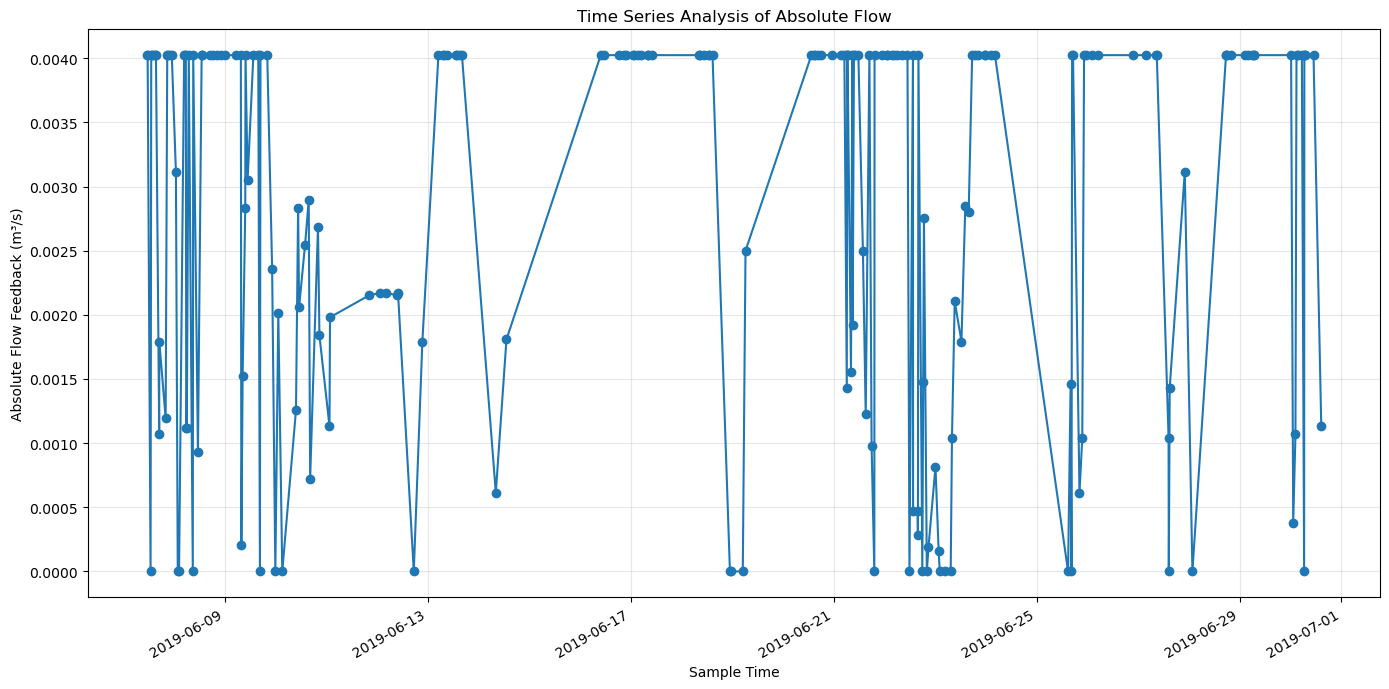

In [26]:
# Convert your sorted Spark DataFrame to pandas
sortedDf200_pandas = sortedDf200.toPandas()

# Import plotting libraries
import matplotlib.pyplot as plt
import pandas as pd

# Make sure sample_time is in datetime format
sortedDf200_pandas['sample_time'] = pd.to_datetime(sortedDf200_pandas['sample_time'])

# Create the time series plot
plt.figure(figsize=(14, 7))
plt.plot(sortedDf200_pandas['sample_time'], sortedDf200_pandas['AbsFlow_Fb_m3s'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Sample Time')
plt.ylabel('Absolute Flow Feedback (m³/s)')
plt.title('Time Series Analysis of Absolute Flow')

# Format the date axis for better readability
plt.gcf().autofmt_xdate()  # Auto-rotate date labels

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

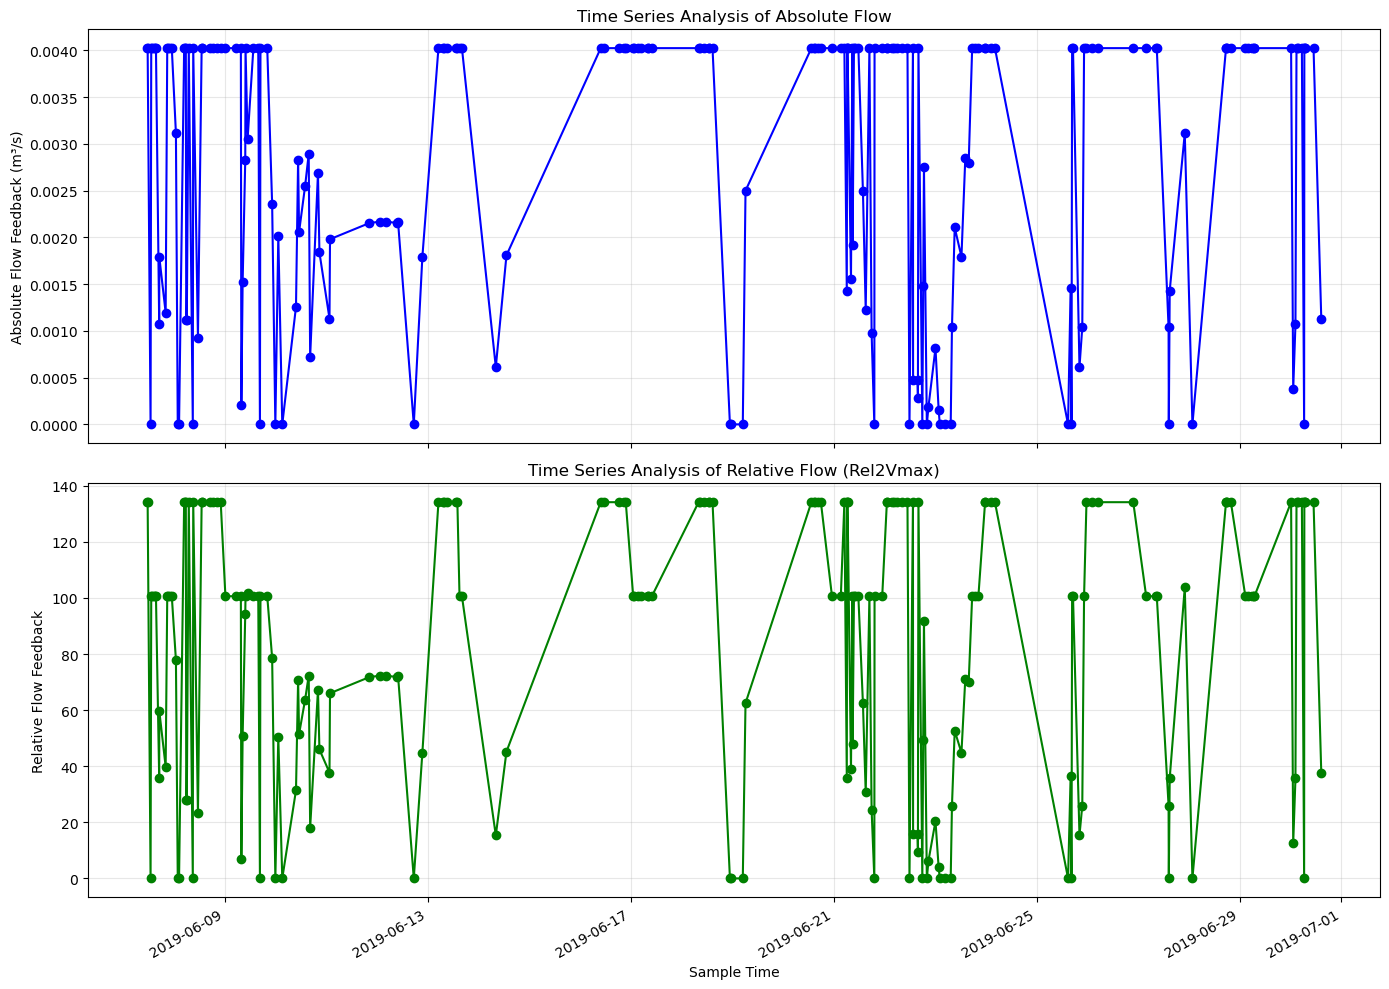

In [27]:
# Convert your sorted Spark DataFrame to pandas
sortedDf200_pandas = sortedDf200.toPandas()

# Import plotting libraries
import matplotlib.pyplot as plt
import pandas as pd

# Make sure sample_time is in datetime format
sortedDf200_pandas['sample_time'] = pd.to_datetime(sortedDf200_pandas['sample_time'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot AbsFlow_Fb_m3s on the first subplot
ax1.plot(sortedDf200_pandas['sample_time'], sortedDf200_pandas['AbsFlow_Fb_m3s'], 
         marker='o', linestyle='-', color='blue')
ax1.set_ylabel('Absolute Flow Feedback (m³/s)')
ax1.set_title('Time Series Analysis of Absolute Flow')
ax1.grid(True, alpha=0.3)

# Plot RelFlow_Fb_Rel2Vmax on the second subplot
ax2.plot(sortedDf200_pandas['sample_time'], sortedDf200_pandas['RelFlow_Fb_Rel2Vmax'], 
         marker='o', linestyle='-', color='green')
ax2.set_xlabel('Sample Time')
ax2.set_ylabel('Relative Flow Feedback')
ax2.set_title('Time Series Analysis of Relative Flow (Rel2Vmax)')
ax2.grid(True, alpha=0.3)

# Format the date axis for better readability
fig.autofmt_xdate()  # Auto-rotate date labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

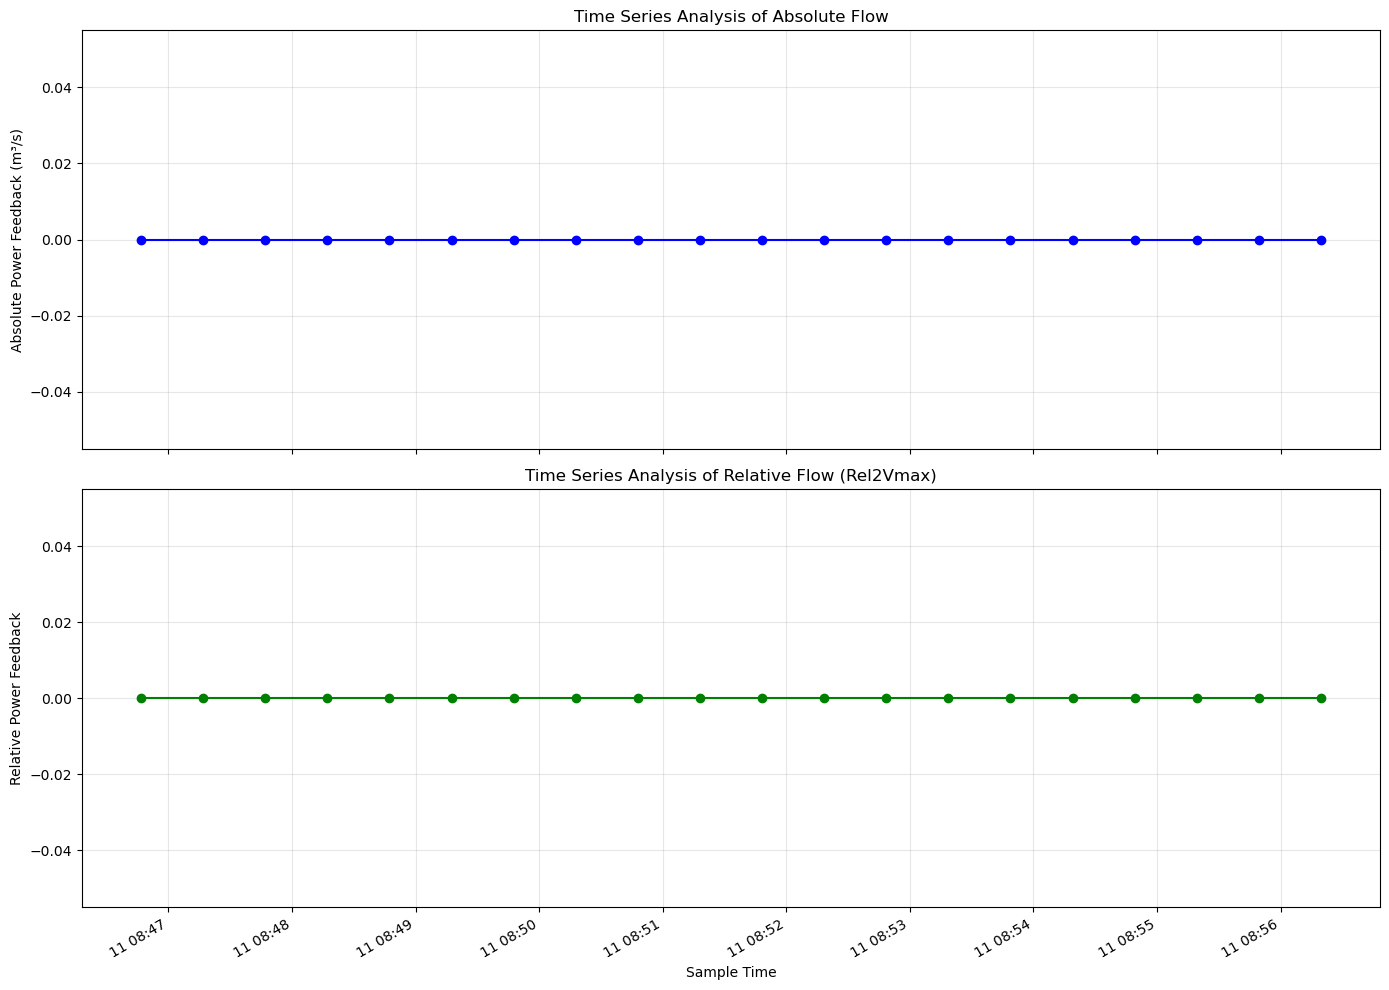

In [11]:
# Convert your sorted Spark DataFrame to pandas
sortedDf200_pandas = df200.toPandas()

# Import plotting libraries
import matplotlib.pyplot as plt
import pandas as pd

# Make sure sample_time is in datetime format
sortedDf200_pandas['sample_time'] = pd.to_datetime(sortedDf200_pandas['sample_time'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot AbsFlow_Fb_m3s on the first subplot
ax1.plot(sortedDf200_pandas['sample_time'], sortedDf200_pandas['AbsPower_Fb_W'], 
         marker='o', linestyle='-', color='blue')
ax1.set_ylabel('Absolute Power Feedback (m³/s)')
ax1.set_title('Time Series Analysis of Absolute Flow')
ax1.grid(True, alpha=0.3)

# Plot RelFlow_Fb_Rel2Vmax on the second subplot
ax2.plot(sortedDf200_pandas['sample_time'], sortedDf200_pandas['RelPower_Fb_Rel2Pmax'], 
         marker='o', linestyle='-', color='green')
ax2.set_xlabel('Sample Time')
ax2.set_ylabel('Relative Power Feedback')
ax2.set_title('Time Series Analysis of Relative Flow (Rel2Vmax)')
ax2.grid(True, alpha=0.3)

# Format the date axis for better readability
fig.autofmt_xdate()  # Auto-rotate date labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
### making the plots with spark only

# Register as a temp view to use Spark SQL
df200.createOrReplaceTempView("device_data")

# Create a time series plot directly with Databricks display function
# This works in Databricks notebooks
display(df200.select("sample_time", "AbsPower_Fb_W", "RelPower_Fb_Rel2Pmax").orderBy("sample_time"))

DataFrame[sample_time: timestamp, AbsPower_Fb_W: double, RelPower_Fb_Rel2Pmax: double]

In [14]:
# Use Databricks' visualization capabilities
# Plot first metric
display(df200.select("sample_time", "AbsPower_Fb_W").orderBy("sample_time"))

# Plot second metric 
display(df200.select("sample_time", "RelPower_Fb_Rel2Pmax").orderBy("sample_time"))

DataFrame[sample_time: timestamp, AbsPower_Fb_W: double]

DataFrame[sample_time: timestamp, RelPower_Fb_Rel2Pmax: double]

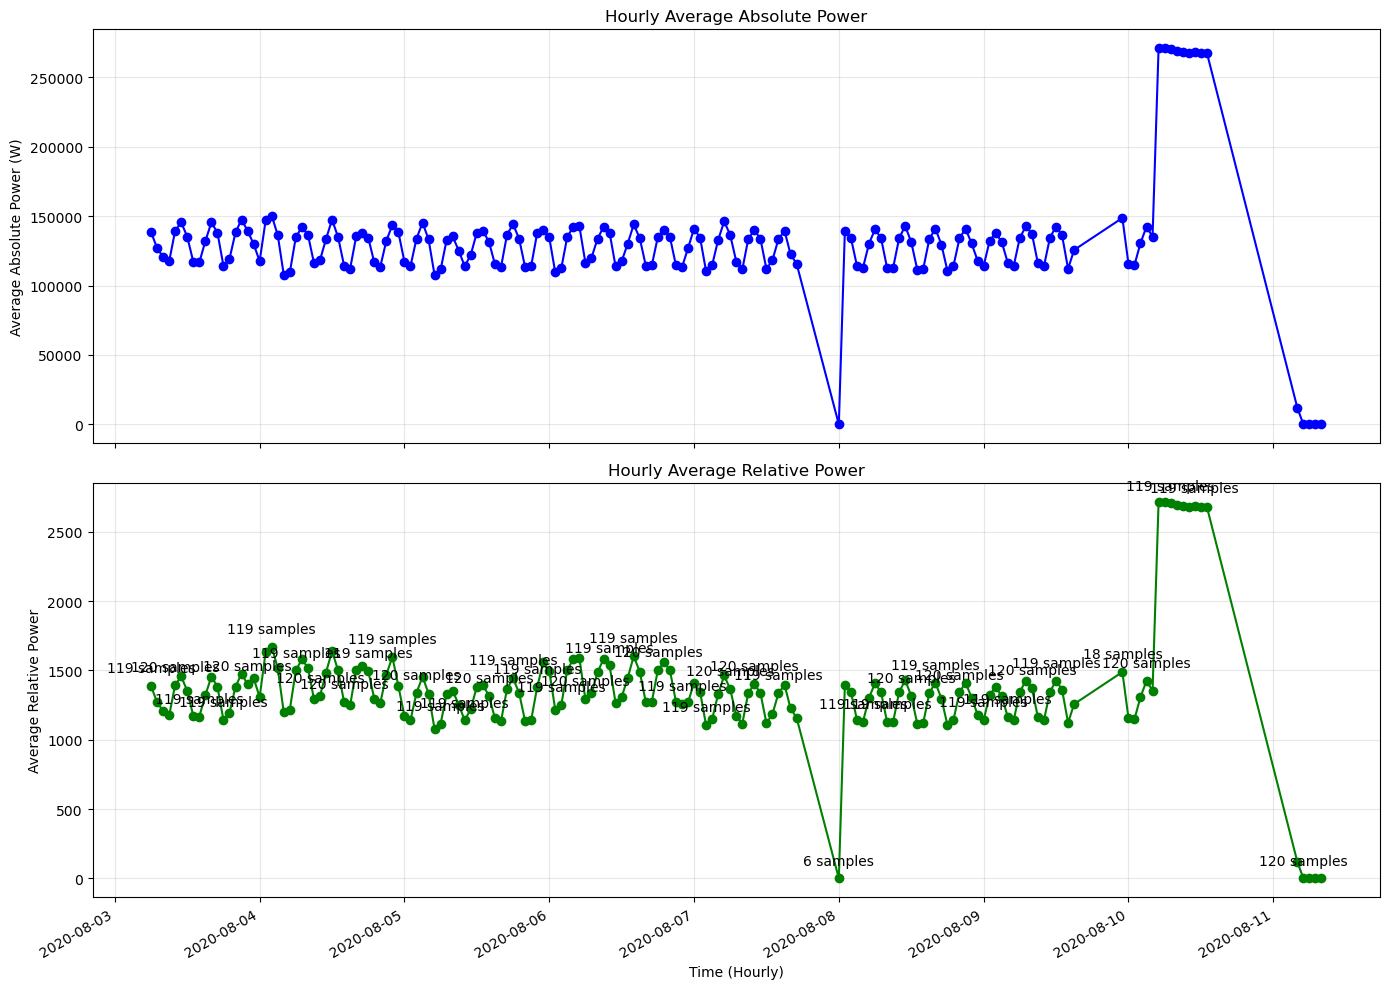

Displaying data from 2020-08-03 06:00:00 to 2020-08-11 08:00:00
Total time periods: 168
Average samples per hour: 116.8


In [18]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from datetime import datetime

# First get your device data
df = spark.read.format("deltaSharing") \
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
    .orderBy(F.desc("sample_time")) \
    .filter("device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'")
    

# Aggregate data by hour to reduce volume
# You can adjust the time window by changing 'hour' to 'day', 'week', etc.
aggregated_data = df.groupBy(F.date_trunc("hour", F.col("sample_time")).alias("hour")) \
    .agg(
        F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
        F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
        F.count("*").alias("sample_count")  # To know how many points in each aggregate
    ) \
    .orderBy("hour")

# Limit to most recent data points if needed
# Adjust the limit as needed for your analysis
recent_data = aggregated_data.orderBy(F.desc("hour")).limit(168)  # Last 48 hours
plot_data = recent_data.orderBy("hour")  # Order chronologically for plotting

# Collect the data - much more efficient with aggregated data
collected_data = plot_data.collect()

# Extract data into Python lists
hours = [row["hour"] for row in collected_data]
avg_abs_power = [row["avg_abs_power"] for row in collected_data]
avg_rel_power = [row["avg_rel_power"] for row in collected_data]
sample_counts = [row["sample_count"] for row in collected_data]

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot average absolute power
ax1.plot(hours, avg_abs_power, marker='o', linestyle='-', color='blue')
ax1.set_ylabel('Average Absolute Power (W)')
ax1.set_title('Hourly Average Absolute Power')
ax1.grid(True, alpha=0.3)

# Plot average relative power
ax2.plot(hours, avg_rel_power, marker='o', linestyle='-', color='green')
ax2.set_xlabel('Time (Hourly)')
ax2.set_ylabel('Average Relative Power')
ax2.set_title('Hourly Average Relative Power')
ax2.grid(True, alpha=0.3)

# Add annotation about sample counts if desired
for i, txt in enumerate(sample_counts):
    if i % 4 == 0:  # Annotate every 4th point to avoid clutter
        ax2.annotate(f"{txt} samples", 
                    (hours[i], avg_rel_power[i]),
                    textcoords="offset points",
                    xytext=(0,10), 
                    ha='center')

# Format date axis
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Print summary stats
print(f"Displaying data from {min(hours)} to {max(hours)}")
print(f"Total time periods: {len(hours)}")
print(f"Average samples per hour: {sum(sample_counts)/len(sample_counts):.1f}")

#### penultimate week

Data range: Max date is 2020-08-11 08:56:19.632000
Penultimate week: 2020-07-28 08:56:19.632000 to 2020-08-04 08:56:19.632000


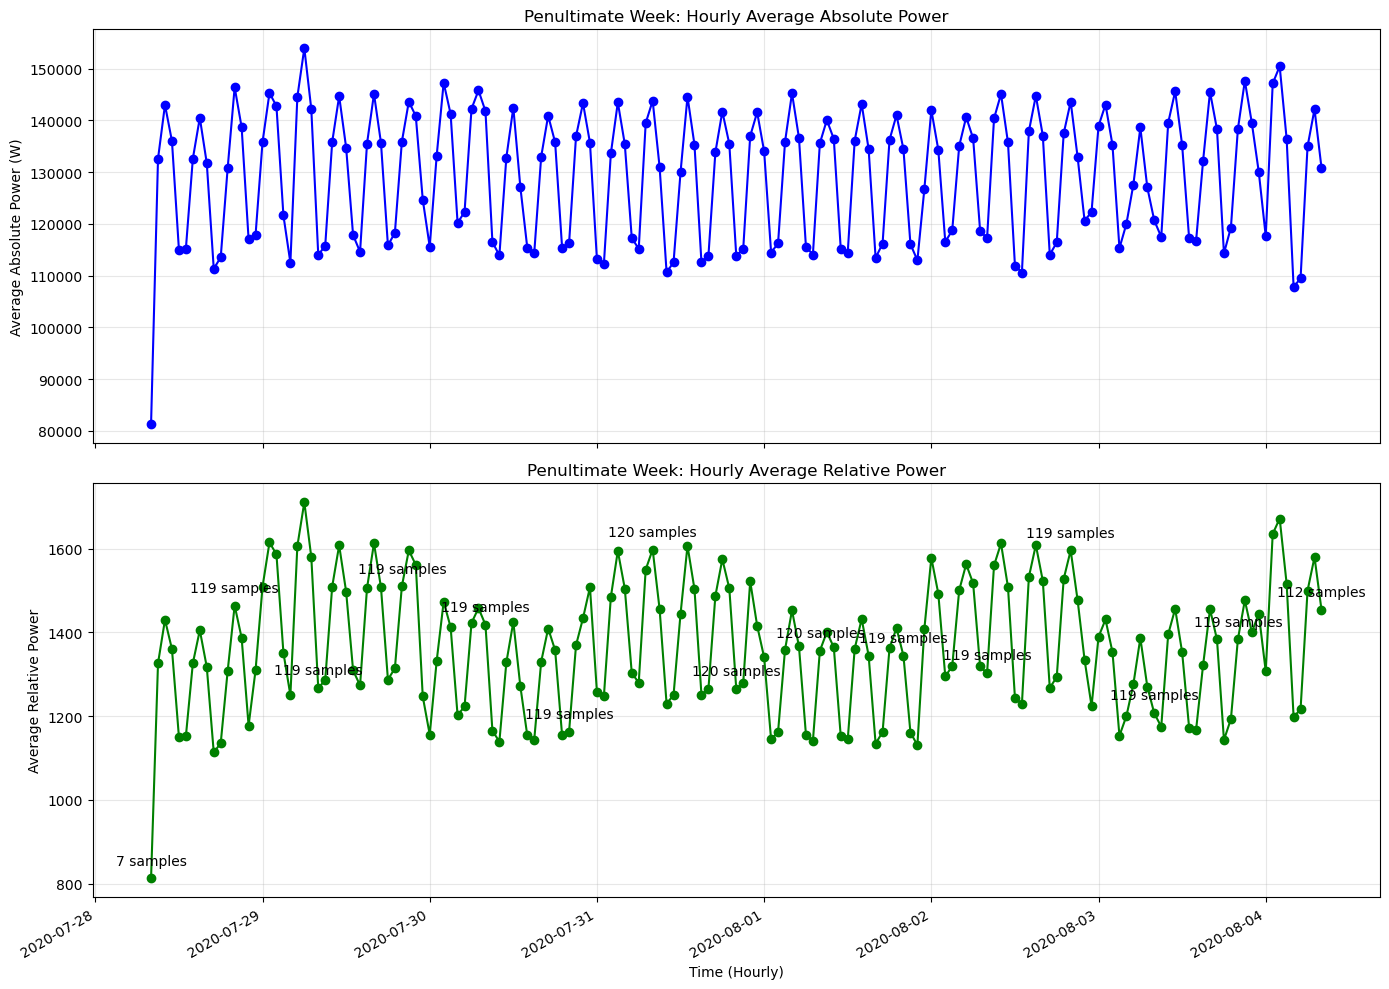

Displaying data from 2020-07-28 08:00:00 to 2020-08-04 08:00:00
Total time periods: 169
Average samples per hour: 118.6
Total samples analyzed: 20047


In [19]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# First get your device data
df = spark.read.format("deltaSharing") \
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
    .filter("device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'")

# First, find the max date in the dataset
max_date_row = df.agg(F.max("sample_time").alias("max_date")).collect()[0]
max_date = max_date_row["max_date"]

# Calculate the start and end dates for the penultimate week
# End date is one week before the max date
end_date = max_date - timedelta(days=7)
# Start date is two weeks before the max date
start_date = max_date - timedelta(days=14)

print(f"Data range: Max date is {max_date}")
print(f"Penultimate week: {start_date} to {end_date}")

# Filter to get only the penultimate week
penultimate_week_df = df.filter(
    (F.col("sample_time") >= start_date) & 
    (F.col("sample_time") < end_date)
)

# Aggregate data by hour
aggregated_data = penultimate_week_df.groupBy(F.date_trunc("hour", F.col("sample_time")).alias("hour")) \
    .agg(
        F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
        F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
        F.count("*").alias("sample_count")
    ) \
    .orderBy("hour")

# Collect the data - should be around 168 hours (7 days * 24 hours)
plot_data = aggregated_data.orderBy("hour")
collected_data = plot_data.collect()

# Extract data into Python lists
hours = [row["hour"] for row in collected_data]
avg_abs_power = [row["avg_abs_power"] for row in collected_data]
avg_rel_power = [row["avg_rel_power"] for row in collected_data]
sample_counts = [row["sample_count"] for row in collected_data]

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot average absolute power
ax1.plot(hours, avg_abs_power, marker='o', linestyle='-', color='blue')
ax1.set_ylabel('Average Absolute Power (W)')
ax1.set_title('Penultimate Week: Hourly Average Absolute Power')
ax1.grid(True, alpha=0.3)

# Plot average relative power
ax2.plot(hours, avg_rel_power, marker='o', linestyle='-', color='green')
ax2.set_xlabel('Time (Hourly)')
ax2.set_ylabel('Average Relative Power')
ax2.set_title('Penultimate Week: Hourly Average Relative Power')
ax2.grid(True, alpha=0.3)

# Add annotation about sample counts
for i, txt in enumerate(sample_counts):
    if i % 12 == 0:  # Annotate every 12th point to reduce clutter
        ax2.annotate(f"{txt} samples", 
                    (hours[i], avg_rel_power[i]),
                    textcoords="offset points",
                    xytext=(0,10), 
                    ha='center')

# Format date axis
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Print summary stats
if hours:
    print(f"Displaying data from {min(hours)} to {max(hours)}")
    print(f"Total time periods: {len(hours)}")
    print(f"Average samples per hour: {sum(sample_counts)/len(sample_counts):.1f}")
    print(f"Total samples analyzed: {sum(sample_counts)}")
else:
    print("No data found for the penultimate week.")

### hourly for april and february (Spring and winter)

Analyzing April 2020: from 2020-04-01 00:00:00 to 2020-05-01 00:00:00
Found 85913 records for April 2020


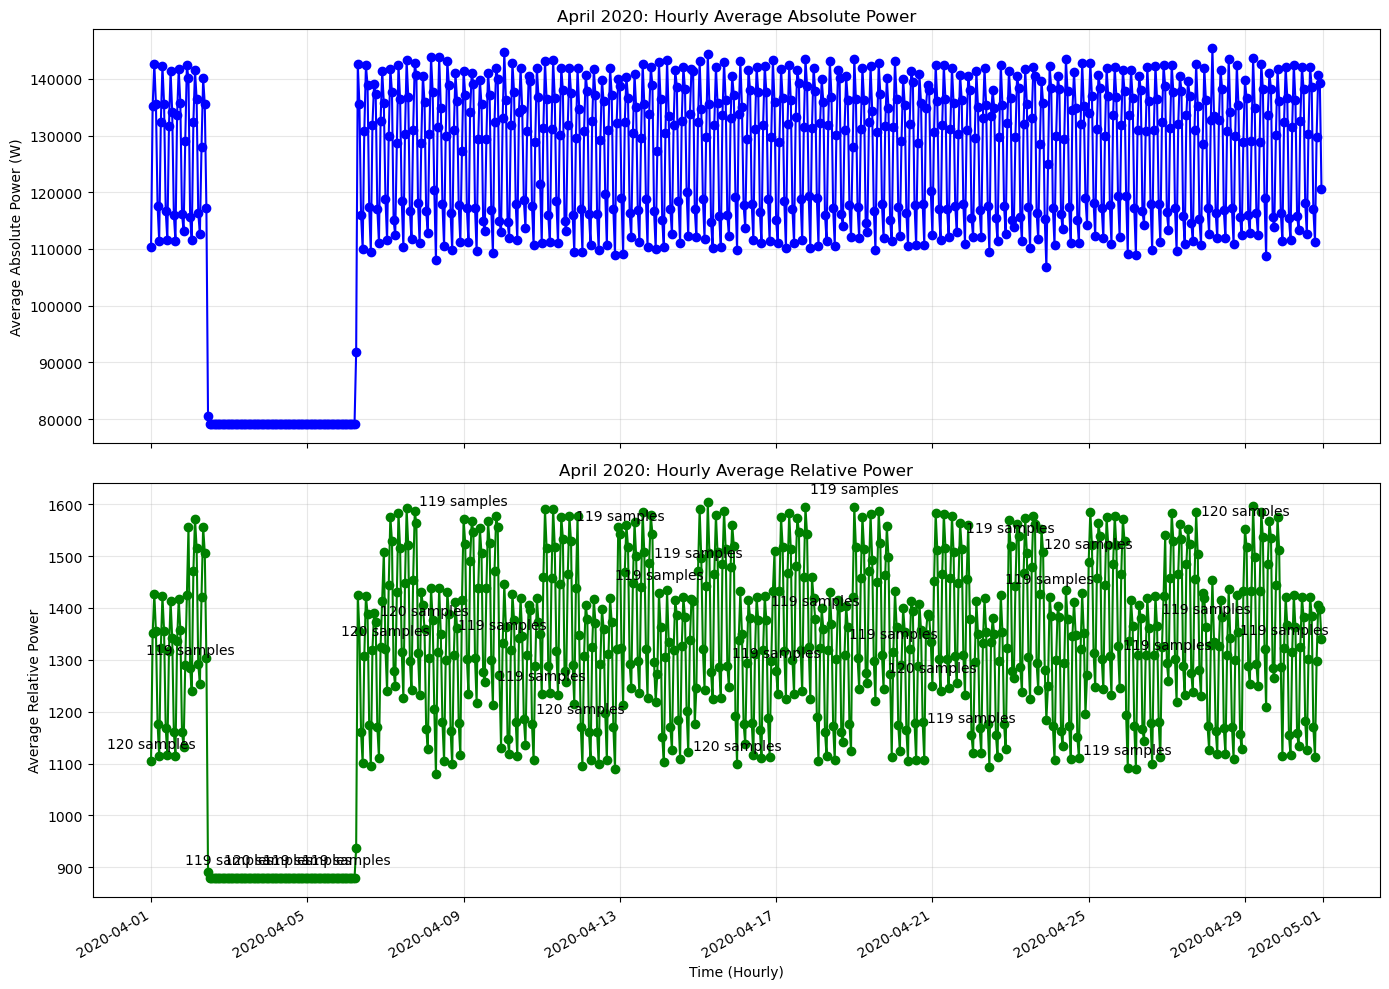

Displaying data from 2020-04-01 00:00:00 to 2020-04-30 23:00:00
Total time periods: 720
Average samples per hour: 119.3
Total samples analyzed: 85913
Analyzing February 2020: from 2020-02-01 00:00:00 to 2020-03-01 00:00:00
Found 83048 records for February 2020


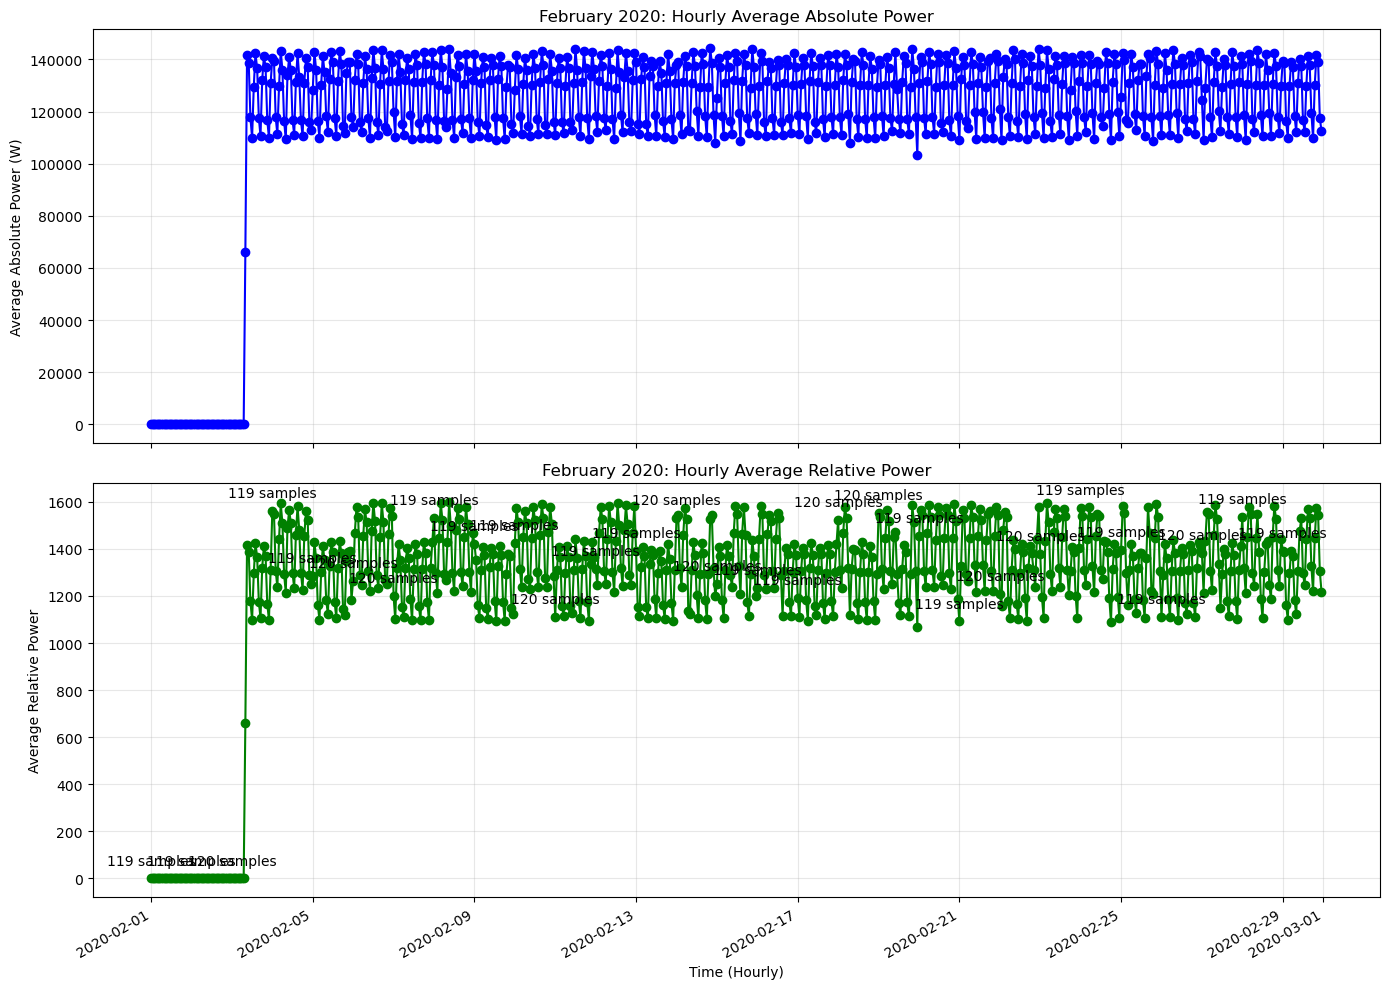

Displaying data from 2020-02-01 00:00:00 to 2020-02-29 23:00:00
Total time periods: 696
Average samples per hour: 119.3
Total samples analyzed: 83048


In [20]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from datetime import datetime

# Function to analyze a specific month
def analyze_month(device_id, year, month, month_name):
    # First day of the target month
    start_date = datetime(year, month, 1)
    
    # First day of next month (for the end boundary)
    if month == 12:
        end_date = datetime(year + 1, 1, 1)
    else:
        end_date = datetime(year, month + 1, 1)
    
    print(f"Analyzing {month_name} {year}: from {start_date} to {end_date}")
    
    # Get device data for the specific month
    df = spark.read.format("deltaSharing") \
        .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
        .filter(f"device_id = '{device_id}'") \
        .filter(F.col("sample_time") >= start_date) \
        .filter(F.col("sample_time") < end_date)
    
    # Check if we have data
    count = df.count()
    if count == 0:
        print(f"No data found for {month_name} {year}")
        return
    
    print(f"Found {count} records for {month_name} {year}")
    
    # Aggregate data by hour
    aggregated_data = df.groupBy(F.date_trunc("hour", F.col("sample_time")).alias("hour")) \
        .agg(
            F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
            F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
            F.count("*").alias("sample_count")
        ) \
        .orderBy("hour")
    
    # Collect the data
    plot_data = aggregated_data.orderBy("hour")
    collected_data = plot_data.collect()
    
    if not collected_data:
        print(f"No aggregated data available for {month_name} {year}")
        return
    
    # Extract data into Python lists
    hours = [row["hour"] for row in collected_data]
    avg_abs_power = [row["avg_abs_power"] for row in collected_data]
    avg_rel_power = [row["avg_rel_power"] for row in collected_data]
    sample_counts = [row["sample_count"] for row in collected_data]
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # Plot average absolute power
    ax1.plot(hours, avg_abs_power, marker='o', linestyle='-', color='blue')
    ax1.set_ylabel('Average Absolute Power (W)')
    ax1.set_title(f'{month_name} {year}: Hourly Average Absolute Power')
    ax1.grid(True, alpha=0.3)
    
    # Plot average relative power
    ax2.plot(hours, avg_rel_power, marker='o', linestyle='-', color='green')
    ax2.set_xlabel('Time (Hourly)')
    ax2.set_ylabel('Average Relative Power')
    ax2.set_title(f'{month_name} {year}: Hourly Average Relative Power')
    ax2.grid(True, alpha=0.3)
    
    # Add annotation about sample counts
    for i, txt in enumerate(sample_counts):
        if i % 24 == 0:  # Annotate every 24th point (once per day)
            ax2.annotate(f"{txt} samples", 
                        (hours[i], avg_rel_power[i]),
                        textcoords="offset points",
                        xytext=(0,10), 
                        ha='center')
    
    # Format date axis
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
    
    # Print summary stats
    print(f"Displaying data from {min(hours)} to {max(hours)}")
    print(f"Total time periods: {len(hours)}")
    print(f"Average samples per hour: {sum(sample_counts)/len(sample_counts):.1f}")
    print(f"Total samples analyzed: {sum(sample_counts)}")

# Device ID
device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'

# Analyze April 2020
analyze_month(device_id, 2020, 4, "April")

# Analyze February 2020
analyze_month(device_id, 2020, 2, "February")

### Daily aggregated for april and feb

Analyzing April 2020: from 2020-04-01 00:00:00 to 2020-05-01 00:00:00
Found 85913 records for April 2020
Analyzing February 2020: from 2020-02-01 00:00:00 to 2020-03-01 00:00:00
Found 83048 records for February 2020


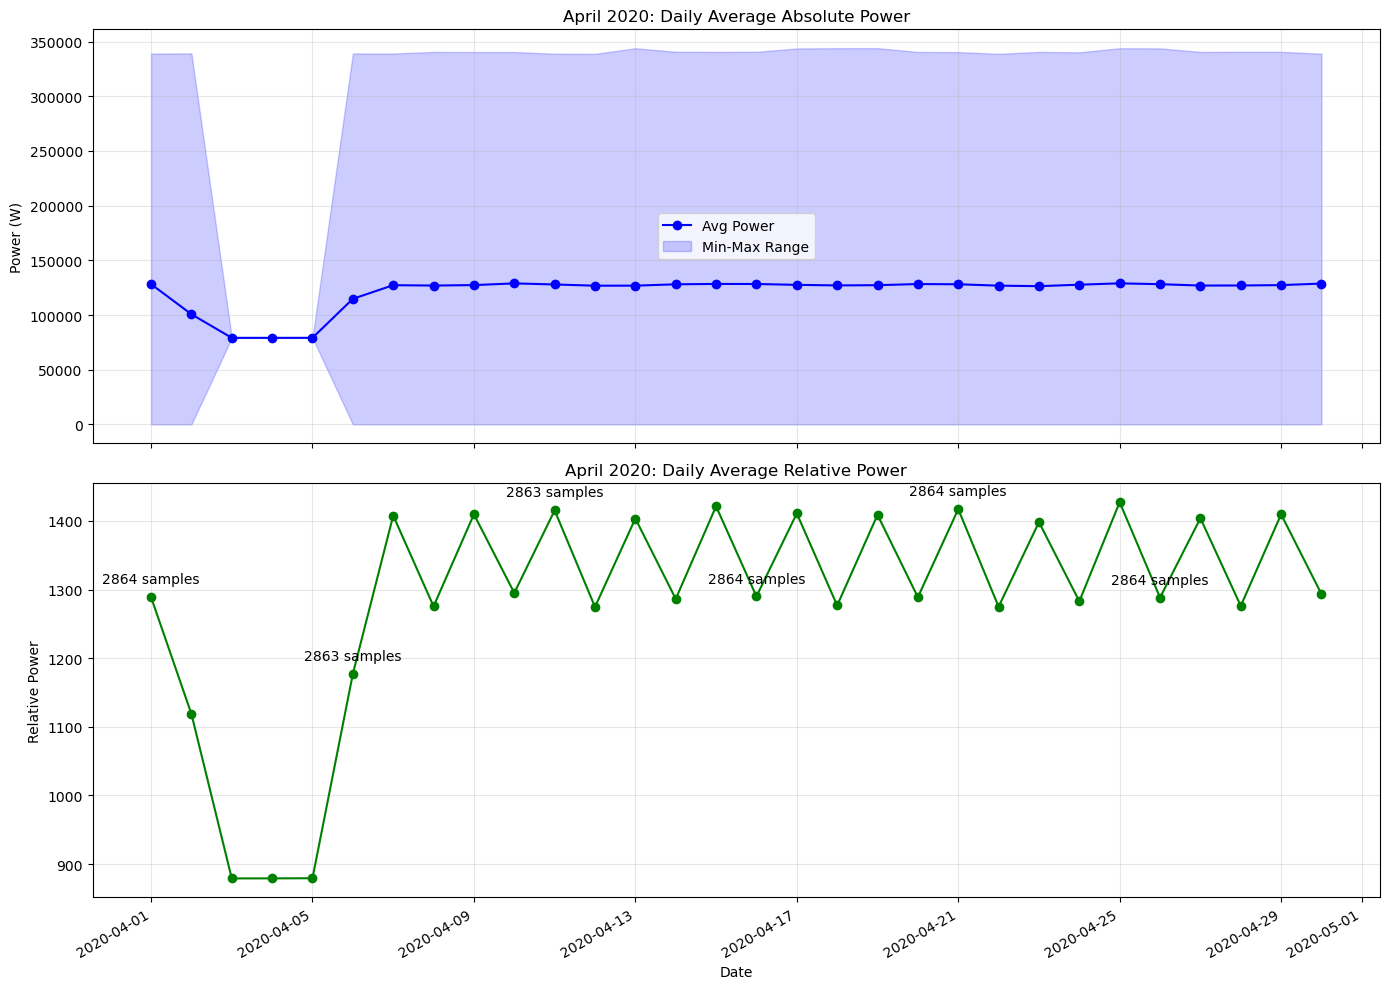

Displaying data for April 2020
Date range: 2020-04-01 00:00:00 to 2020-04-30 00:00:00
Total days with data: 30
Average samples per day: 2863.8
Total samples analyzed: 85913
Average power: 121489.53 W
Min power: 0.00 W, Max power: 344046.60 W


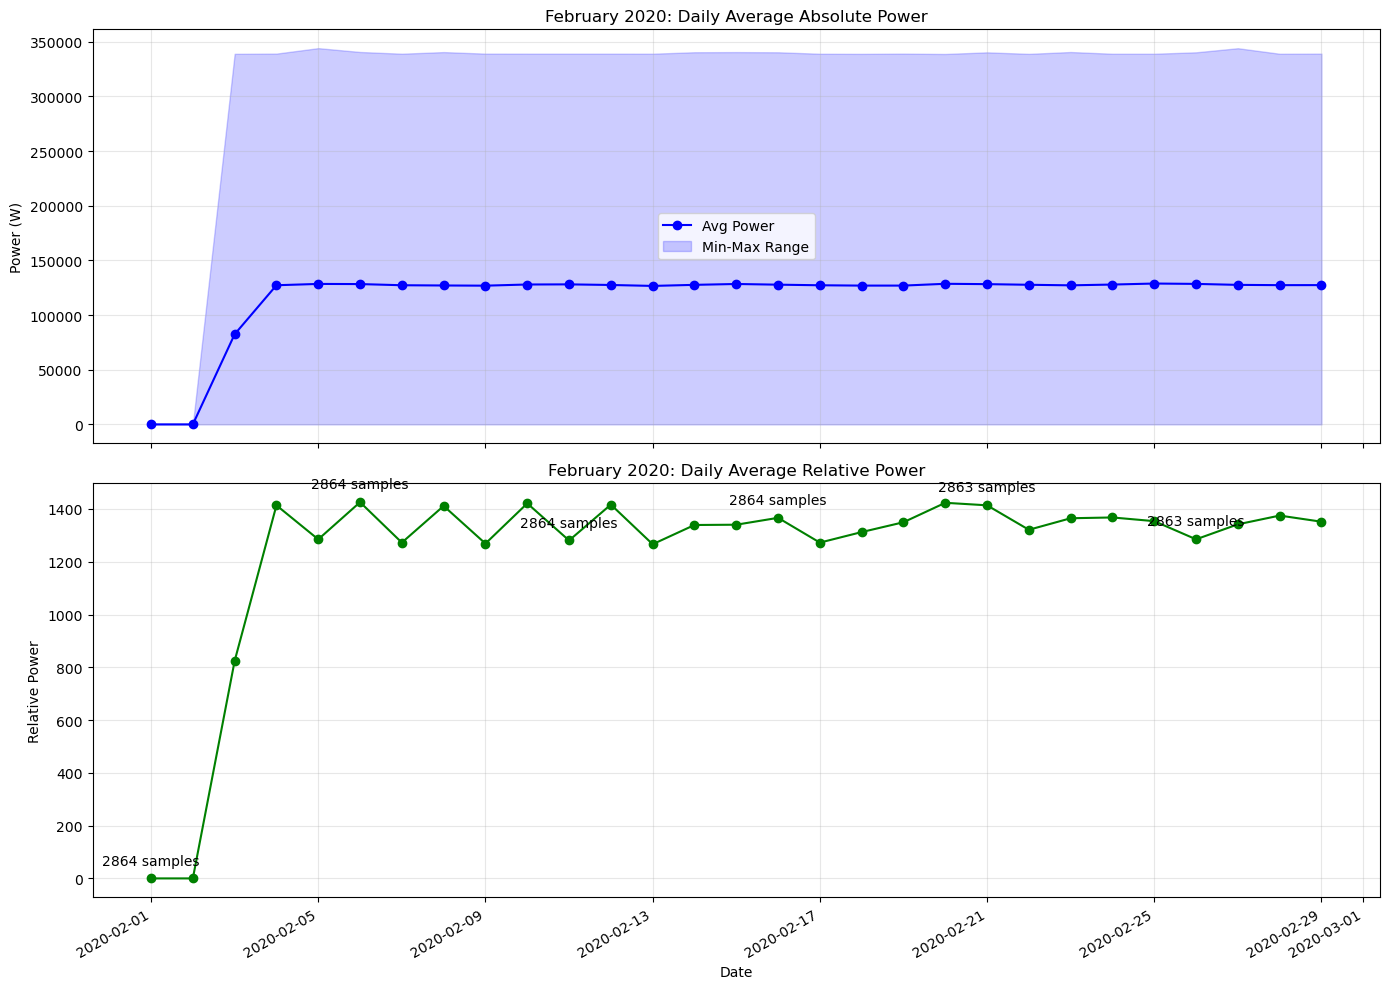

Displaying data for February 2020
Date range: 2020-02-01 00:00:00 to 2020-02-29 00:00:00
Total days with data: 29
Average samples per day: 2863.7
Total samples analyzed: 83048
Average power: 117302.18 W
Min power: 0.00 W, Max power: 344114.91 W


In [21]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from datetime import datetime

# Function to analyze a specific month with daily aggregation
def analyze_month_daily(device_id, year, month, month_name):
    # First day of the target month
    start_date = datetime(year, month, 1)
    
    # First day of next month (for the end boundary)
    if month == 12:
        end_date = datetime(year + 1, 1, 1)
    else:
        end_date = datetime(year, month + 1, 1)
    
    print(f"Analyzing {month_name} {year}: from {start_date} to {end_date}")
    
    # Get device data for the specific month
    df = spark.read.format("deltaSharing") \
        .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
        .filter(f"device_id = '{device_id}'") \
        .filter(F.col("sample_time") >= start_date) \
        .filter(F.col("sample_time") < end_date)
    
    # Check if we have data
    count = df.count()
    if count == 0:
        print(f"No data found for {month_name} {year}")
        return None
    
    print(f"Found {count} records for {month_name} {year}")
    
    # Aggregate data by day (instead of hour)
    aggregated_data = df.groupBy(F.date_trunc("day", F.col("sample_time")).alias("day")) \
        .agg(
            F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
            F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
            F.count("*").alias("sample_count"),
            F.min("AbsPower_Fb_W").alias("min_abs_power"),
            F.max("AbsPower_Fb_W").alias("max_abs_power")
        ) \
        .orderBy("day")
    
    # Collect the data
    collected_data = aggregated_data.collect()
    
    if not collected_data:
        print(f"No aggregated data available for {month_name} {year}")
        return None
    
    return {
        "month_name": month_name,
        "year": year,
        "data": collected_data
    }

# Device ID
device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'

# Analyze both months
april_data = analyze_month_daily(device_id, 2020, 4, "April")
february_data = analyze_month_daily(device_id, 2020, 2, "February")

# Function to plot the results
def plot_monthly_data(month_data):
    if not month_data:
        return
    
    collected_data = month_data["data"]
    month_name = month_data["month_name"]
    year = month_data["year"]
    
    # Extract data into Python lists
    days = [row["day"] for row in collected_data]
    avg_abs_power = [row["avg_abs_power"] for row in collected_data]
    avg_rel_power = [row["avg_rel_power"] for row in collected_data]
    sample_counts = [row["sample_count"] for row in collected_data]
    min_power = [row["min_abs_power"] for row in collected_data]
    max_power = [row["max_abs_power"] for row in collected_data]
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # Plot average absolute power
    ax1.plot(days, avg_abs_power, marker='o', linestyle='-', color='blue', label='Avg Power')
    
    # Add min/max range as shaded area
    ax1.fill_between(days, min_power, max_power, color='blue', alpha=0.2, label='Min-Max Range')
    
    ax1.set_ylabel('Power (W)')
    ax1.set_title(f'{month_name} {year}: Daily Average Absolute Power')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot average relative power
    ax2.plot(days, avg_rel_power, marker='o', linestyle='-', color='green')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Relative Power')
    ax2.set_title(f'{month_name} {year}: Daily Average Relative Power')
    ax2.grid(True, alpha=0.3)
    
    # Add annotation about sample counts
    for i, txt in enumerate(sample_counts):
        if i % 5 == 0:  # Annotate every 5th point to reduce clutter
            ax2.annotate(f"{txt} samples", 
                        (days[i], avg_rel_power[i]),
                        textcoords="offset points",
                        xytext=(0,10), 
                        ha='center')
    
    # Format date axis
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
    
    # Print summary stats
    print(f"Displaying data for {month_name} {year}")
    print(f"Date range: {min(days)} to {max(days)}")
    print(f"Total days with data: {len(days)}")
    print(f"Average samples per day: {sum(sample_counts)/len(sample_counts):.1f}")
    print(f"Total samples analyzed: {sum(sample_counts)}")
    print(f"Average power: {sum(avg_abs_power)/len(avg_abs_power):.2f} W")
    print(f"Min power: {min(min_power):.2f} W, Max power: {max(max_power):.2f} W")

# Plot data for each month
if april_data:
    plot_monthly_data(april_data)
    
if february_data:
    plot_monthly_data(february_data)

### Yearly aggragted on days 

Analyzing data from 2019-08-12 08:56:19.632000 to 2020-08-11 08:56:19.632000
Found 1025849 records for the last year


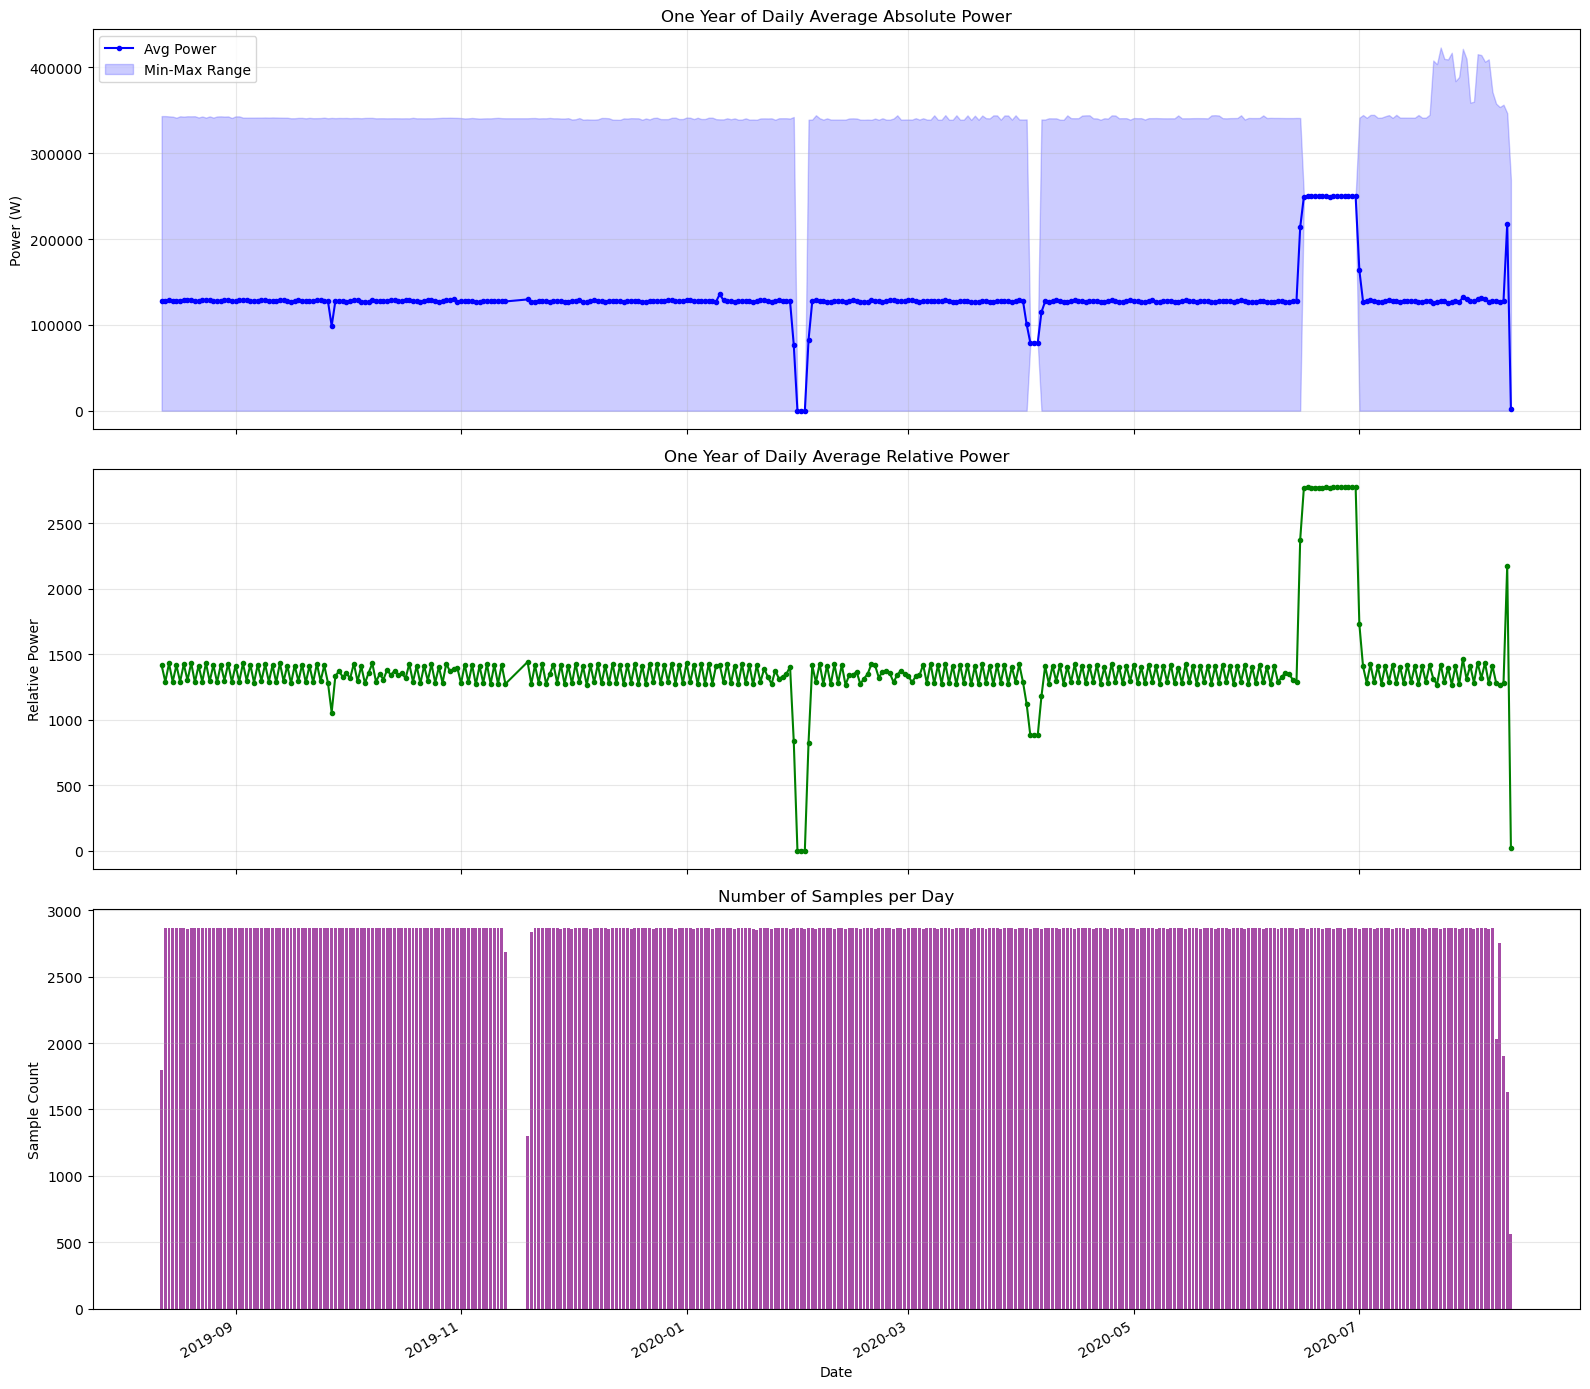

Displaying data from 2019-08-12 00:00:00 to 2020-08-11 00:00:00
Total days with data: 361 out of 365
Average samples per day: 2841.7
Total samples analyzed: 1025849
Average power over the year: 131192.09 W
Min power: 0.00 W, Max power: 423007.33 W

Monthly Summary:
                 power  samples  days_with_data
month                                          
2019-08  128516.469358    56263              20
2019-09  127204.173602    86009              30
2019-10  127975.285776    88876              31
2019-11  127635.819646    69889              25
2019-12  127762.434176    88778              31
2020-01  122326.657679    88770              31
2020-02  117302.183025    83048              29
2020-03  127630.718203    88779              31
2020-04  121489.527667    85913              30
2020-05  127566.607142    88777              31
2020-06  191310.957424    85913              30
2020-07  128761.962695    88777              31
2020-08  124953.141089    26057              11


In [22]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to analyze a full year of data, looking back from the most recent date
def analyze_year_daily(device_id):
    # Get the device data
    df = spark.read.format("deltaSharing") \
        .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
        .filter(f"device_id = '{device_id}'")
    
    # Find the most recent date in the dataset
    max_date_row = df.agg(F.max("sample_time").alias("max_date")).collect()[0]
    max_date = max_date_row["max_date"]
    
    # Calculate start date (one year before max date)
    start_date = max_date - timedelta(days=365)
    
    print(f"Analyzing data from {start_date} to {max_date}")
    
    # Filter data for the last year
    year_df = df.filter(F.col("sample_time") >= start_date) \
              .filter(F.col("sample_time") <= max_date)
    
    # Check if we have data
    count = year_df.count()
    if count == 0:
        print("No data found for the specified time range")
        return
    
    print(f"Found {count} records for the last year")
    
    # Aggregate data by day
    aggregated_data = year_df.groupBy(F.date_trunc("day", F.col("sample_time")).alias("day")) \
        .agg(
            F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
            F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
            F.count("*").alias("sample_count"),
            F.min("AbsPower_Fb_W").alias("min_abs_power"),
            F.max("AbsPower_Fb_W").alias("max_abs_power")
        ) \
        .orderBy("day")
    
    # Collect the data
    collected_data = aggregated_data.collect()
    
    if not collected_data:
        print("No aggregated data available")
        return
    
    # Extract data into Python lists
    days = [row["day"] for row in collected_data]
    avg_abs_power = [row["avg_abs_power"] for row in collected_data]
    avg_rel_power = [row["avg_rel_power"] for row in collected_data]
    sample_counts = [row["sample_count"] for row in collected_data]
    min_power = [row["min_abs_power"] for row in collected_data]
    max_power = [row["max_abs_power"] for row in collected_data]
    
    # Create figure with 3 subplots (power, relative power, and sample counts)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 14), sharex=True)
    
    # Plot 1: Average absolute power with min-max range
    ax1.plot(days, avg_abs_power, marker='.', linestyle='-', color='blue', label='Avg Power')
    ax1.fill_between(days, min_power, max_power, color='blue', alpha=0.2, label='Min-Max Range')
    ax1.set_ylabel('Power (W)')
    ax1.set_title('One Year of Daily Average Absolute Power')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Average relative power
    ax2.plot(days, avg_rel_power, marker='.', linestyle='-', color='green')
    ax2.set_ylabel('Relative Power')
    ax2.set_title('One Year of Daily Average Relative Power')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Sample counts per day
    ax3.bar(days, sample_counts, color='purple', alpha=0.7)
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Sample Count')
    ax3.set_title('Number of Samples per Day')
    ax3.grid(True, axis='y', alpha=0.3)
    
    # Format date axis
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
    
    # Calculate monthly averages for a summary
    import pandas as pd
    pd_data = pd.DataFrame({
        'day': days,
        'power': avg_abs_power,
        'rel_power': avg_rel_power,
        'samples': sample_counts
    })
    pd_data['month'] = pd.to_datetime(pd_data['day']).dt.strftime('%Y-%m')
    monthly_summary = pd_data.groupby('month').agg({
        'power': 'mean',
        'samples': 'sum',
        'day': 'count'
    }).rename(columns={'day': 'days_with_data'})
    
    # Print summary stats
    print(f"Displaying data from {min(days)} to {max(days)}")
    print(f"Total days with data: {len(days)} out of 365")
    print(f"Average samples per day: {sum(sample_counts)/len(sample_counts):.1f}")
    print(f"Total samples analyzed: {sum(sample_counts)}")
    print(f"Average power over the year: {sum(avg_abs_power)/len(avg_abs_power):.2f} W")
    print(f"Min power: {min(min_power):.2f} W, Max power: {max(max_power):.2f} W")
    
    # Print monthly summary
    print("\nMonthly Summary:")
    print(monthly_summary)

# Device ID
device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'

# Analyze a full year of data
analyze_year_daily(device_id)

Full data range: 2019-03-06 16:22:59.091000 to 2020-08-11 08:56:19.632000


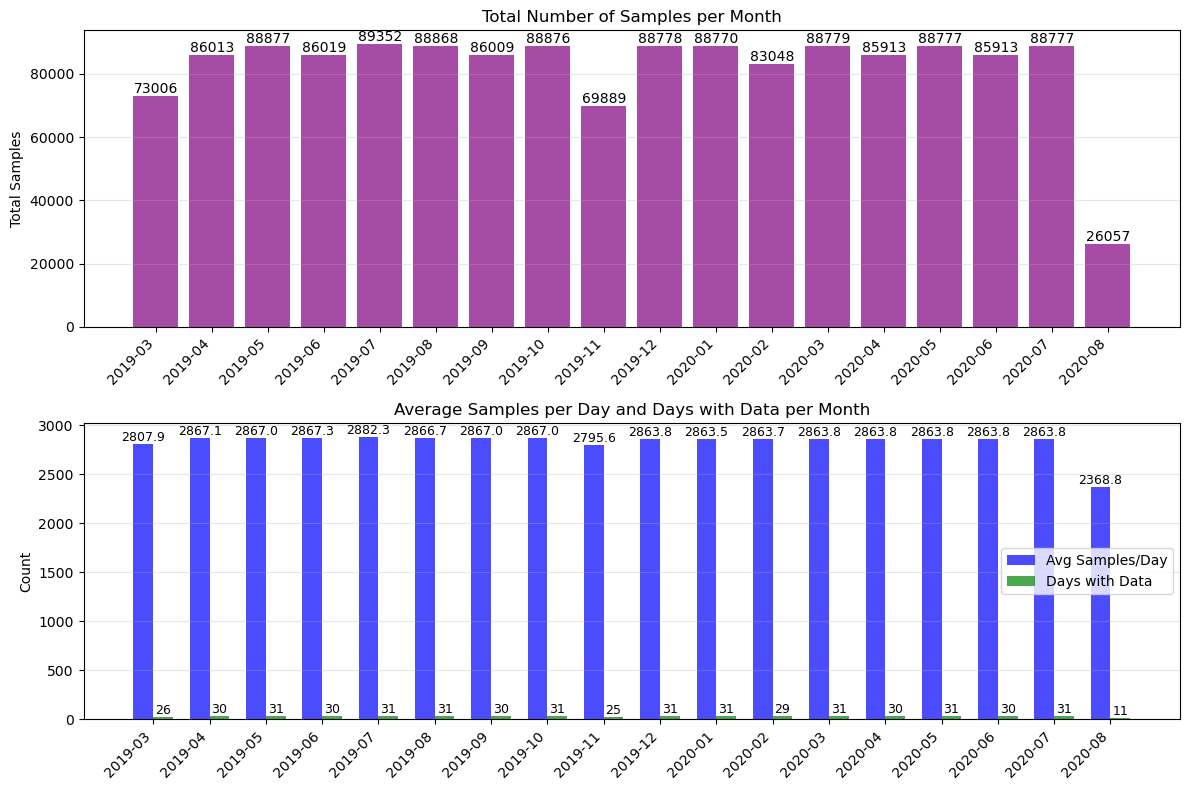


Monthly Sample Summary:
  month  total_samples  avg_samples_per_day  days_with_data
2019-03          73006          2807.923077              26
2019-04          86013          2867.100000              30
2019-05          88877          2867.000000              31
2019-06          86019          2867.300000              30
2019-07          89352          2882.322581              31
2019-08          88868          2866.709677              31
2019-09          86009          2866.966667              30
2019-10          88876          2866.967742              31
2019-11          69889          2795.560000              25
2019-12          88778          2863.806452              31
2020-01          88770          2863.548387              31
2020-02          83048          2863.724138              29
2020-03          88779          2863.838710              31
2020-04          85913          2863.766667              30
2020-05          88777          2863.774194              31
2020-06        

In [23]:
# Function to create a monthly histogram of sample counts
def create_monthly_samples_histogram(device_id):
    # Get the device data
    df = spark.read.format("deltaSharing") \
        .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
        .filter(f"device_id = '{device_id}'")
    
    # Find the date range in the dataset
    date_stats = df.agg(
        F.min("sample_time").alias("min_date"),
        F.max("sample_time").alias("max_date")
    ).collect()[0]
    
    min_date = date_stats["min_date"]
    max_date = date_stats["max_date"]
    
    print(f"Full data range: {min_date} to {max_date}")
    
    # Aggregate data by day first to get daily sample counts
    daily_counts = df.groupBy(F.date_trunc("day", F.col("sample_time")).alias("day")) \
        .agg(F.count("*").alias("sample_count")) \
        .orderBy("day")
    
    # Convert to pandas for easier monthly aggregation
    daily_df = daily_counts.toPandas()
    
    # Convert day column to datetime and extract month
    daily_df['day'] = pd.to_datetime(daily_df['day'])
    daily_df['month'] = daily_df['day'].dt.strftime('%Y-%m')
    
    # Aggregate by month
    monthly_counts = daily_df.groupby('month').agg({
        'sample_count': ['sum', 'mean', 'count']
    })
    
    monthly_counts.columns = ['total_samples', 'avg_samples_per_day', 'days_with_data']
    monthly_counts = monthly_counts.reset_index()
    
    # Create the histogram
    plt.figure(figsize=(12, 8))
    
    # Main bar chart for total samples
    ax1 = plt.subplot(2, 1, 1)
    bars = ax1.bar(monthly_counts['month'], monthly_counts['total_samples'], color='purple', alpha=0.7)
    ax1.set_ylabel('Total Samples')
    ax1.set_title('Total Number of Samples per Month')
    ax1.grid(True, axis='y', alpha=0.3)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom', rotation=0)
    
    # Second subplot for average samples per day
    ax2 = plt.subplot(2, 1, 2)
    
    # Create a side-by-side bar chart
    x = range(len(monthly_counts))
    width = 0.35
    
    # Bar for average samples per day
    bars1 = ax2.bar([i - width/2 for i in x], monthly_counts['avg_samples_per_day'], 
                    width, color='blue', alpha=0.7, label='Avg Samples/Day')
    
    # Bar for days with data
    bars2 = ax2.bar([i + width/2 for i in x], monthly_counts['days_with_data'], 
                    width, color='green', alpha=0.7, label='Days with Data')
    
    # Set x-labels to months
    ax2.set_xticks(x)
    ax2.set_xticklabels(monthly_counts['month'])
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    
    ax2.set_ylabel('Count')
    ax2.set_title('Average Samples per Day and Days with Data per Month')
    ax2.grid(True, axis='y', alpha=0.3)
    ax2.legend()
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}',
                ha='center', va='bottom', rotation=0, fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom', rotation=0, fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\nMonthly Sample Summary:")
    print(monthly_counts.to_string(index=False))
    
    return monthly_counts

# Device ID
device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'

# Create the monthly histogram
monthly_data = create_monthly_samples_histogram(device_id)

### yearly with anamoly?? 

Analyzing data from 2019-08-12 08:56:19.632000 to 2020-08-11 08:56:19.632000
Found 1025849 records for the last year


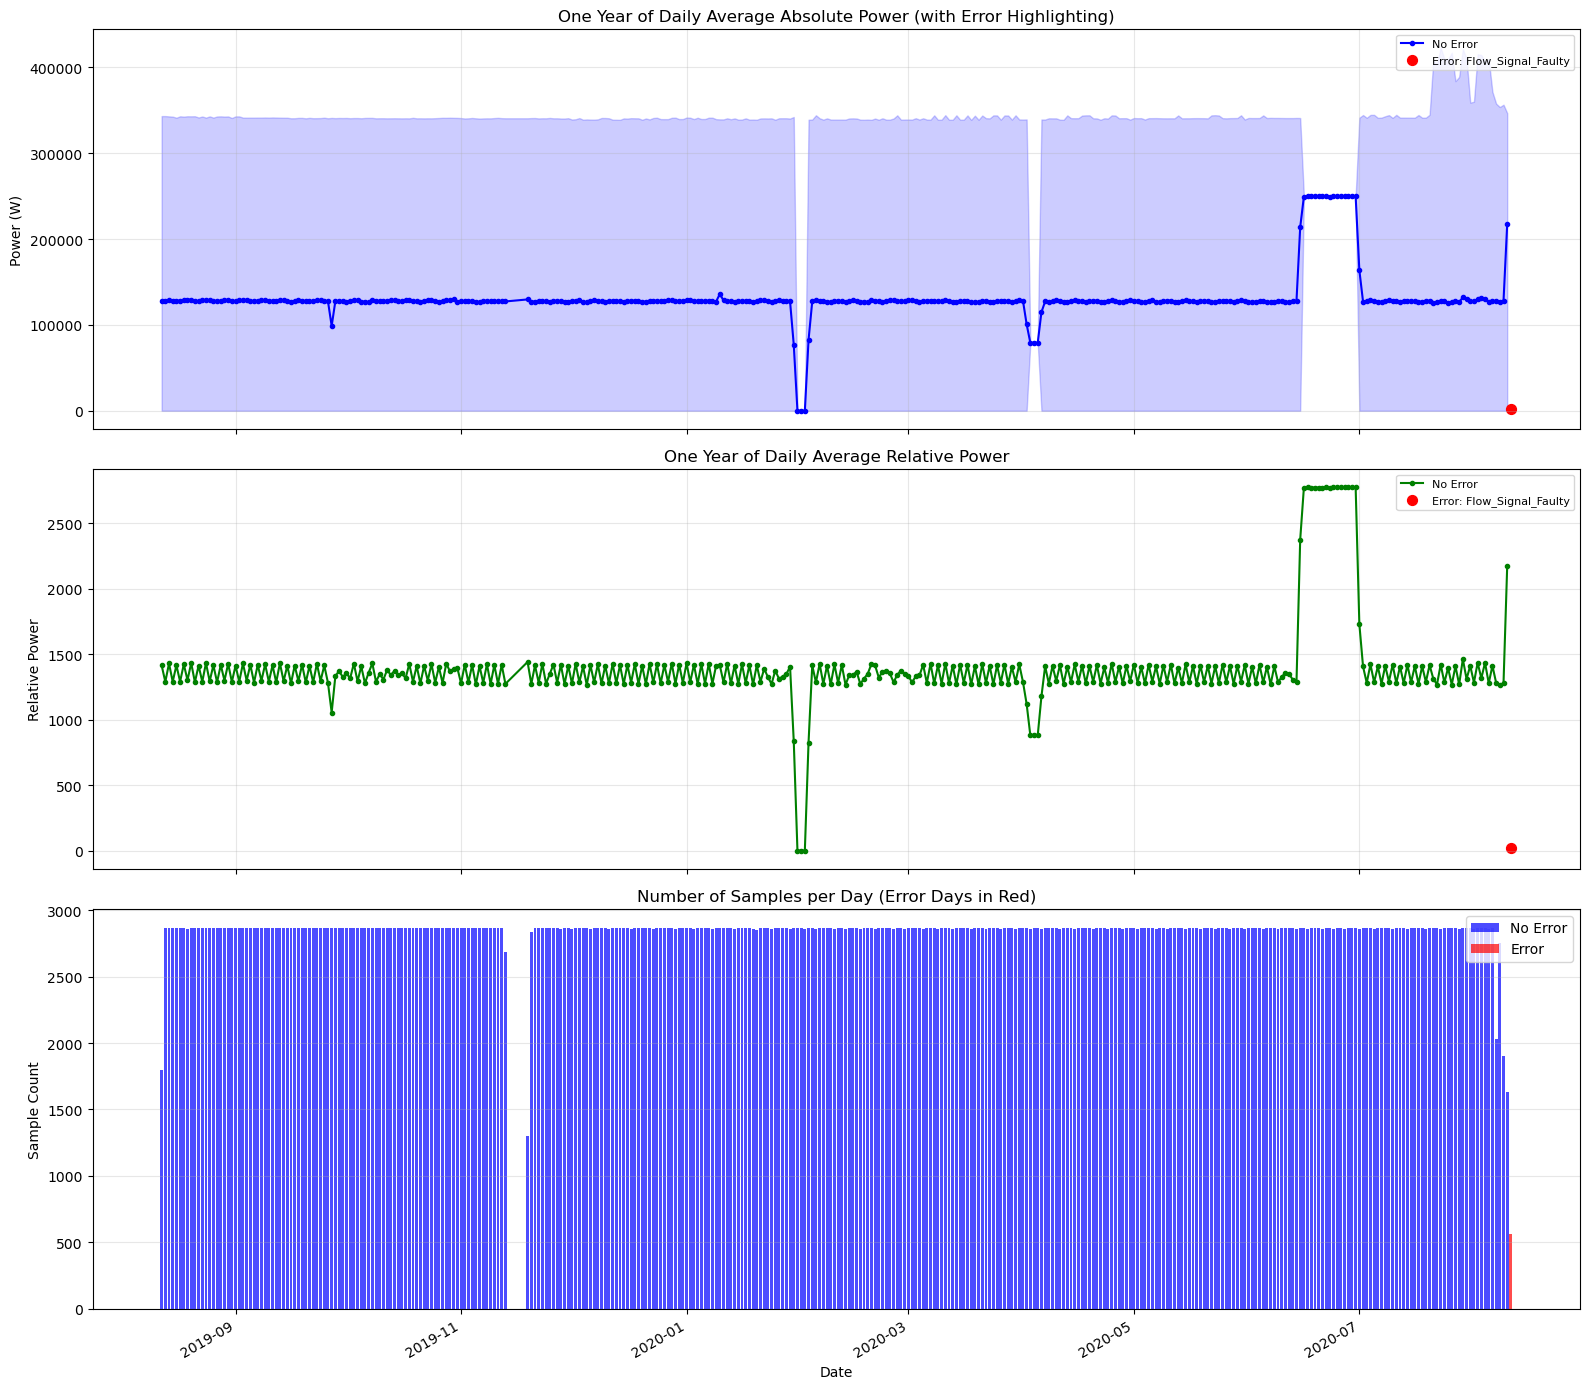

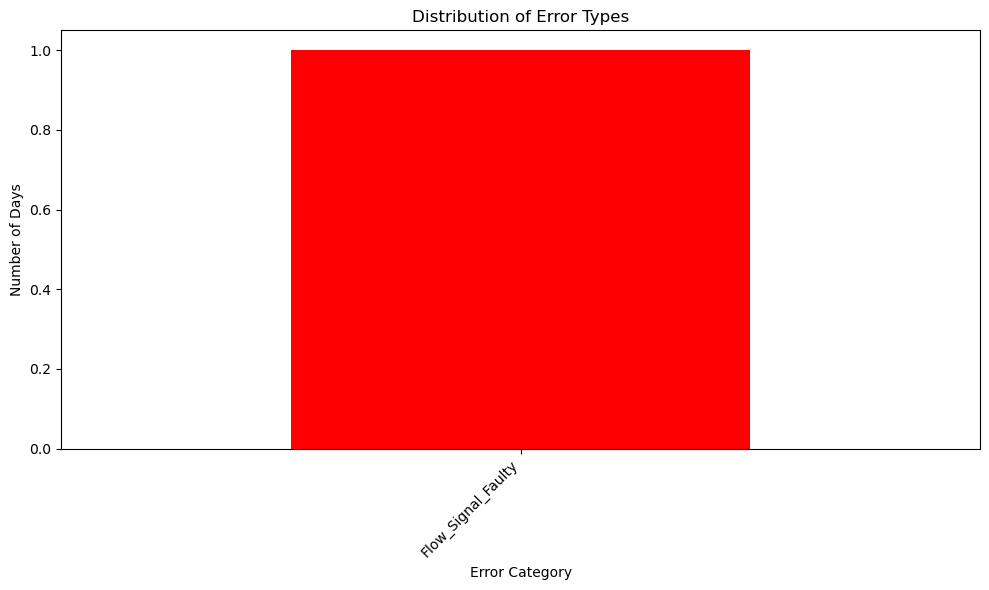

Displaying data from 2019-08-12 00:00:00 to 2020-08-11 00:00:00
Total days with data: 361 out of 365
Average samples per day: 2841.7
Total samples analyzed: 1025849

Days with errors: 1 (0.3%)

Error Category Distribution:
Flow_Signal_Faulty: 1 days (0.3%)


In [5]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Define error categories
ERROR_CATEGORIES = {
    1: "T1_Err",
    2: "T2_Err",
    4: "Flow_Signal_Faulty", 
    8: "Actuator_Stalled",
    16: "Flow_with_closed_Valve",
    32: "Airbubbles",
    64: "V_Dmd_nReached",
    128: "P_Dmd_nReached",
    256: "BPosG",
    512: "RevFlow",
    1024: "MP2_nAlive",
    2048: "FreezeWarn"
}

# Function to analyze a full year of data with error status highlighting
def analyze_year_daily_with_errors(device_id):
    # Get the device data
    df = spark.read.format("deltaSharing") \
        .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
        .filter(f"device_id = '{device_id}'")
    
    # Find the most recent date in the dataset
    max_date_row = df.agg(F.max("sample_time").alias("max_date")).collect()[0]
    max_date = max_date_row["max_date"]
    
    # Calculate start date (one year before max date)
    start_date = max_date - timedelta(days=365)
    
    print(f"Analyzing data from {start_date} to {max_date}")
    
    # Filter data for the last year
    year_df = df.filter(F.col("sample_time") >= start_date) \
              .filter(F.col("sample_time") <= max_date)
    
    # Check if we have data
    count = year_df.count()
    if count == 0:
        print("No data found for the specified time range")
        return
    
    print(f"Found {count} records for the last year")
    
    # Aggregate data by day, including error status
    aggregated_data = year_df.groupBy(F.date_trunc("day", F.col("sample_time")).alias("day")) \
        .agg(
            F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
            F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
            F.count("*").alias("sample_count"),
            F.min("AbsPower_Fb_W").alias("min_abs_power"),
            F.max("AbsPower_Fb_W").alias("max_abs_power"),
            # Mode of error status (most common error code for that day)
            F.expr("percentile_approx(Error_Status_Cloud, 0.5)").alias("error_status")
        ) \
        .orderBy("day")
    
    # Collect the data
    collected_data = aggregated_data.collect()
    
    if not collected_data:
        print("No aggregated data available")
        return
    
    # Convert to pandas DataFrame for easier manipulation
    pdf = pd.DataFrame([{
        "day": row["day"],
        "avg_abs_power": row["avg_abs_power"],
        "avg_rel_power": row["avg_rel_power"],
        "sample_count": row["sample_count"],
        "min_abs_power": row["min_abs_power"],
        "max_abs_power": row["max_abs_power"],
        "error_status": row["error_status"]
    } for row in collected_data])
    
    # Create a function to decode error codes into categories
    def get_error_category(error_code):
        if error_code == 0 or pd.isna(error_code):
            return "No Error"
        
        # Convert to integer if it's not already
        error_code = int(error_code)
        
        # Find the highest bit that is set
        for bit_value in sorted(ERROR_CATEGORIES.keys(), reverse=True):
            if error_code & bit_value:
                return ERROR_CATEGORIES[bit_value]
        
        return "Unknown Error"
    
    # Add error category to the DataFrame
    pdf["error_category"] = pdf["error_status"].apply(get_error_category)
    
    # Create figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 14), sharex=True)
    
    # Plot 1: Average absolute power with error highlighting
    # First plot all regular data points
    normal_days = pdf[pdf["error_category"] == "No Error"]
    error_days = pdf[pdf["error_category"] != "No Error"]
    
    # Plot regular days
    ax1.plot(normal_days["day"], normal_days["avg_abs_power"], 
             marker='.', linestyle='-', color='blue', label='No Error')
    ax1.fill_between(normal_days["day"], normal_days["min_abs_power"], 
                    normal_days["max_abs_power"], color='blue', alpha=0.2)
    
    # Plot error days with a single red color but different markers by category
    if not error_days.empty:
        # Group error days by category
        for category, group in error_days.groupby("error_category"):
            ax1.scatter(group["day"], group["avg_abs_power"], 
                       color='red', s=50, marker='o', 
                       label=f'Error: {category}')
    
    ax1.set_ylabel('Power (W)')
    ax1.set_title('One Year of Daily Average Absolute Power (with Error Highlighting)')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=8)
    
    # Plot 2: Average relative power
    ax2.plot(normal_days["day"], normal_days["avg_rel_power"], 
             marker='.', linestyle='-', color='green', label='No Error')
    
    # Plot error days with a single red color
    if not error_days.empty:
        # Group error days by category
        for category, group in error_days.groupby("error_category"):
            ax2.scatter(group["day"], group["avg_rel_power"], 
                       color='red', s=50, marker='o', 
                       label=f'Error: {category}')
    
    ax2.set_ylabel('Relative Power')
    ax2.set_title('One Year of Daily Average Relative Power')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right', fontsize=8)
    
    # Plot 3: Sample counts per day with error highlighting
    bar_colors = ['red' if cat != "No Error" else 'blue' for cat in pdf["error_category"]]
    ax3.bar(pdf["day"], pdf["sample_count"], color=bar_colors, alpha=0.7)
    
    # Create a custom legend for the bars
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', alpha=0.7, label='No Error'),
        Patch(facecolor='red', alpha=0.7, label='Error')
    ]
    ax3.legend(handles=legend_elements, loc='upper right')
    
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Sample Count')
    ax3.set_title('Number of Samples per Day (Error Days in Red)')
    ax3.grid(True, axis='y', alpha=0.3)
    
    # Format date axis
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
    
    # Create a separate figure for the error distribution
    if not error_days.empty:
        plt.figure(figsize=(10, 6))
        error_counts = error_days.groupby("error_category").size()
        error_counts.plot(kind='bar', color='red')
        plt.title('Distribution of Error Types')
        plt.ylabel('Number of Days')
        plt.xlabel('Error Category')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Print summary stats
    print(f"Displaying data from {pdf['day'].min()} to {pdf['day'].max()}")
    print(f"Total days with data: {len(pdf)} out of 365")
    print(f"Average samples per day: {pdf['sample_count'].mean():.1f}")
    print(f"Total samples analyzed: {pdf['sample_count'].sum()}")
    
    # Error statistics
    error_days_count = len(error_days)
    print(f"\nDays with errors: {error_days_count} ({error_days_count/len(pdf)*100:.1f}%)")
    
    # Group by error category
    error_counts = pdf.groupby("error_category").size().reset_index()
    error_counts.columns = ["Error Category", "Days"]
    error_counts = error_counts.sort_values("Days", ascending=False)
    
    # Print error distribution
    print("\nError Category Distribution:")
    for index, row in error_counts.iterrows():
        category = row["Error Category"]
        days = row["Days"]
        percentage = days/len(pdf)*100
        if category != "No Error":
            print(f"{category}: {days} days ({percentage:.1f}%)")
    
    return pdf

# Device ID
device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'

# Analyze a full year of data with error highlighting
yearly_data_with_errors = analyze_year_daily_with_errors(device_id)

In [1]:
def analyze_year_daily_with_errors(device_id):
    # Keep all your existing code up to where you collect the data and create the pandas DataFrame
    
    # After creating the pandas DataFrame (pdf), modify the error handling:
    
    # Function to decode all error codes into categories
    def get_all_error_categories(error_code):
        if error_code == 0 or pd.isna(error_code):
            return "No Error"
        
        # Convert to integer if it's not already
        error_code = int(error_code)
        
        error_list = []
        # Check each bit and add all matching error categories
        for bit_value in sorted(ERROR_CATEGORIES.keys()):
            if error_code & bit_value:
                error_list.append(ERROR_CATEGORIES[bit_value])
        
        if error_list:
            return ";".join(error_list)  # Join multiple errors with semicolons
        else:
            return "Unknown Error"
    
    # Add comprehensive error categories to the DataFrame
    pdf["all_error_categories"] = pdf["error_status"].apply(get_all_error_categories)
    
    # Keep the rest of your visualization code unchanged
    
    # At the end of the function, before returning pdf:
    
    # Generate filename with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f"belimo_device_{device_id}_{timestamp}.csv"
    
    # Save the DataFrame to CSV with all error information
    pdf.to_csv(csv_filename, index=False)
    print(f"Complete data saved to {csv_filename}")
    
    return pdf

### flow timeseries

Analyzing data from 2019-08-12 08:56:19.632000 to 2020-08-11 08:56:19.632000
Found 1025849 records for the last year


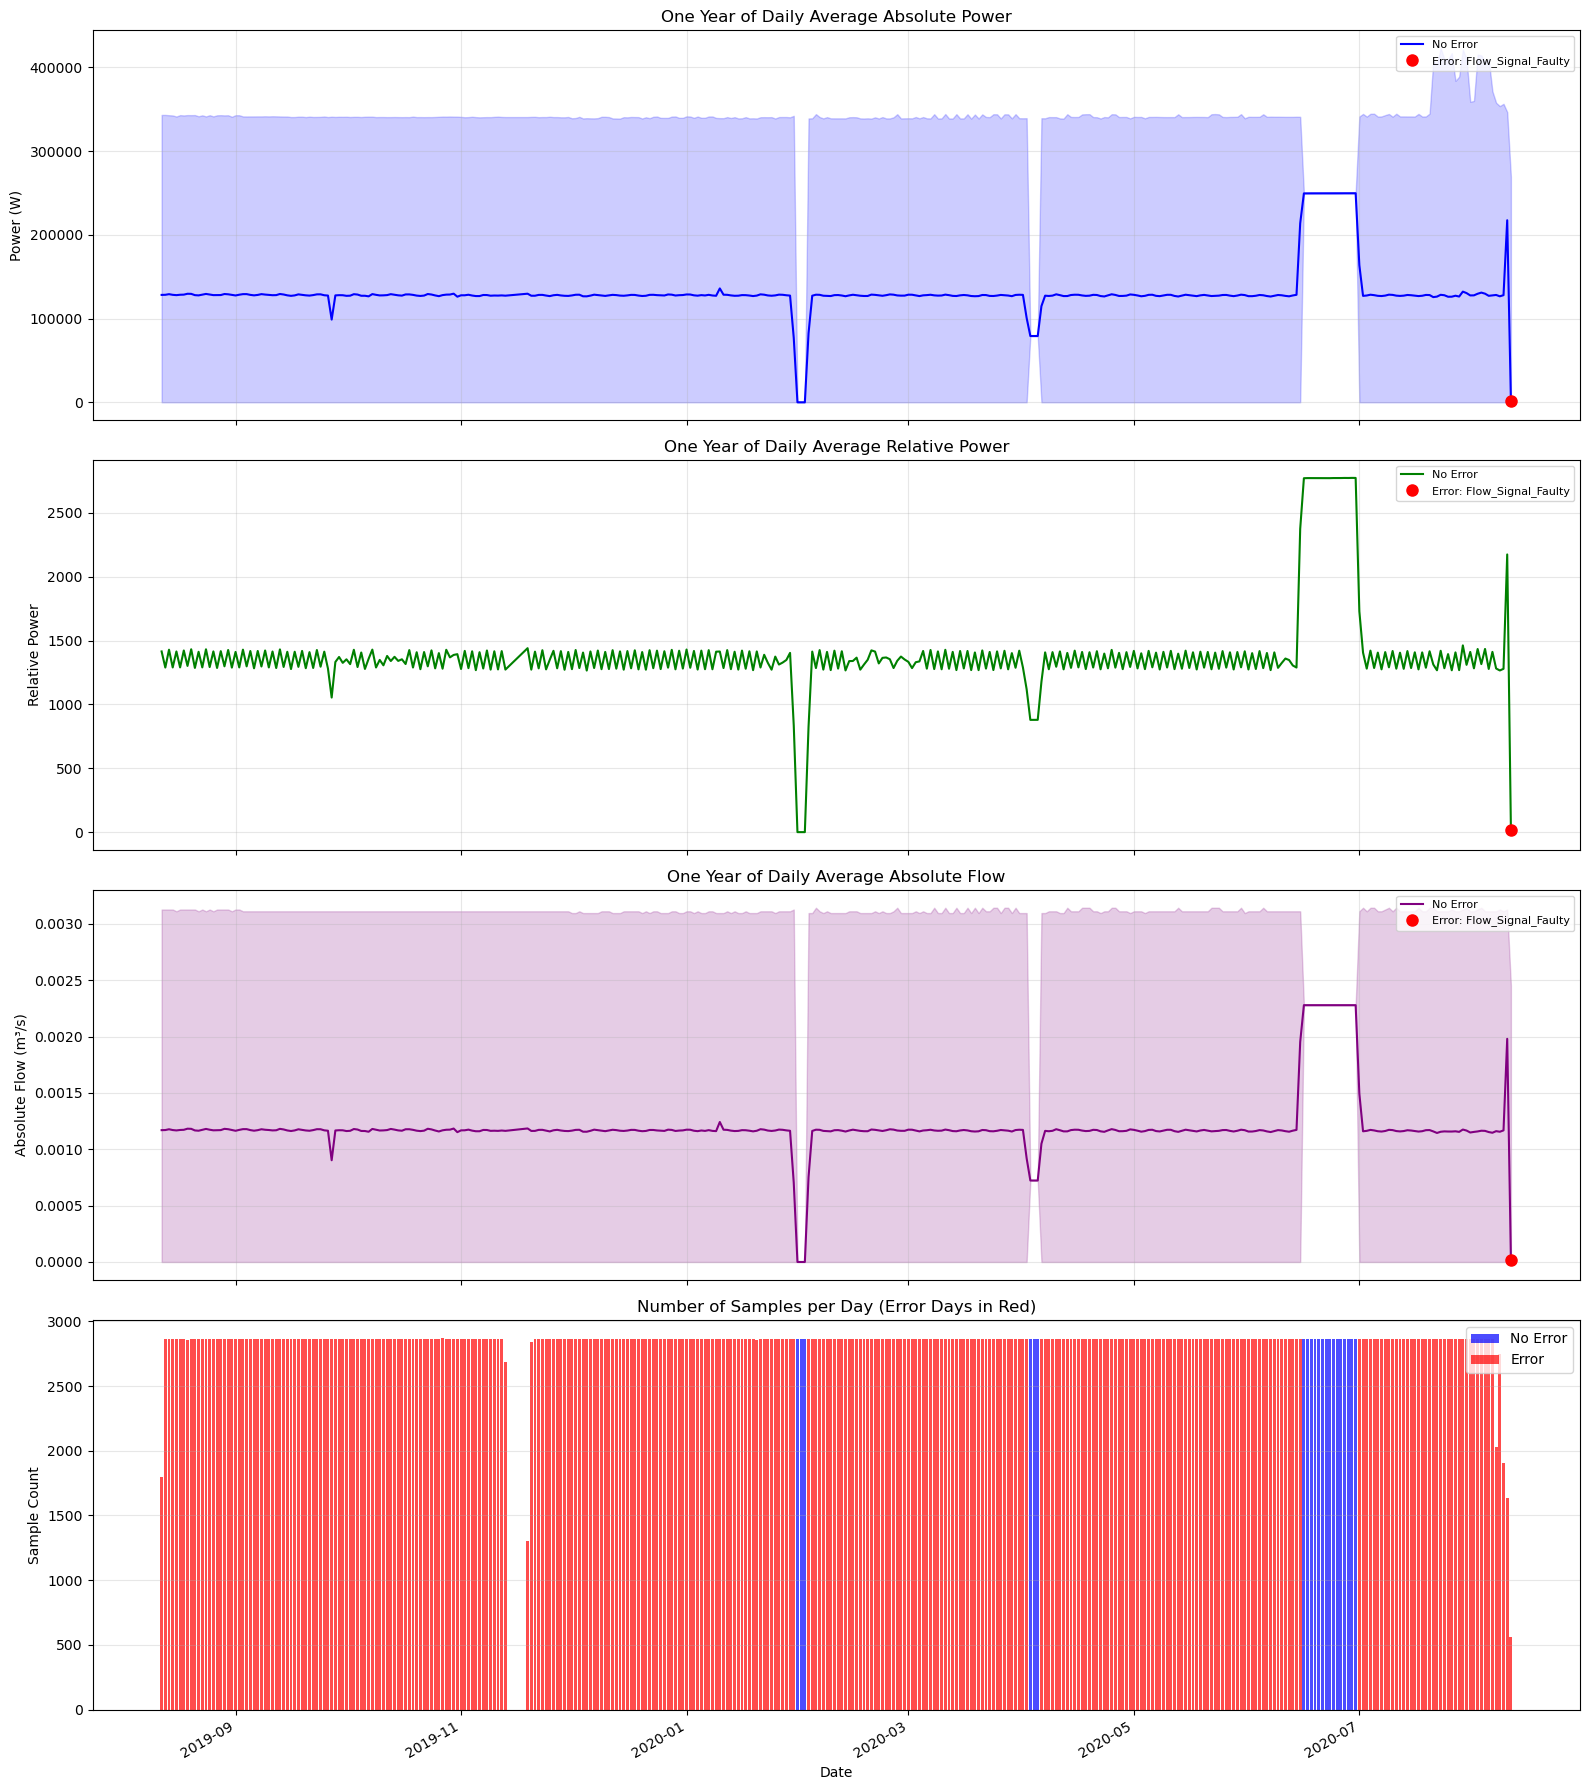

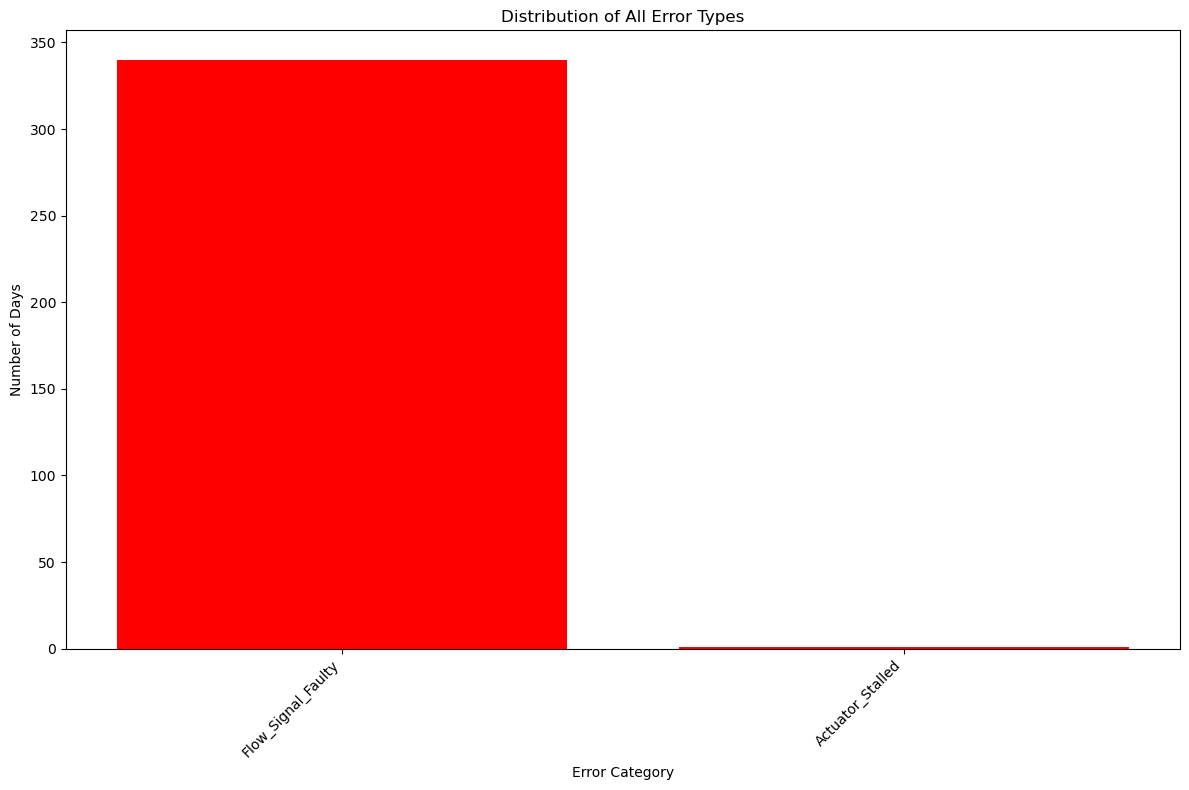

Displaying data from 2019-08-12 00:00:00 to 2020-08-11 00:00:00
Total days with data: 361 out of 365
Average samples per day: 2841.7
Total samples analyzed: 1025849

Days with any errors: 340 (94.2%)
Days with multiple error types: 1 (0.3%)

Error Category Distribution:
Flow_Signal_Faulty: 340 days (94.2%)
Actuator_Stalled: 1 days (0.3%)


In [21]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Define error categories
ERROR_CATEGORIES = {
    1: "T1_Err",
    2: "T2_Err",
    4: "Flow_Signal_Faulty", 
    8: "Actuator_Stalled",
    16: "Flow_with_closed_Valve",
    32: "Airbubbles",
    64: "V_Dmd_nReached",
    128: "P_Dmd_nReached",
    256: "BPosG",
    512: "RevFlow",
    1024: "MP2_nAlive",
    2048: "FreezeWarn"
}

# Function to analyze a full year of data with error status highlighting
def analyze_year_daily_with_errors(device_id):
    # Get the device data
    df = spark.read.format("deltaSharing") \
        .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
        .filter(f"device_id = '{device_id}'")
    
    # Find the most recent date in the dataset
    max_date_row = df.agg(F.max("sample_time").alias("max_date")).collect()[0]
    max_date = max_date_row["max_date"]
    
    # Calculate start date (one year before max date)
    start_date = max_date - timedelta(days=365)
    
    print(f"Analyzing data from {start_date} to {max_date}")
    
    # Filter data for the last year
    year_df = df.filter(F.col("sample_time") >= start_date) \
              .filter(F.col("sample_time") <= max_date)
    
    # Check if we have data
    count = year_df.count()
    if count == 0:
        print("No data found for the specified time range")
        return
    
    print(f"Found {count} records for the last year")
    
    # Aggregate data by day, including error status and new flow columns
    aggregated_data = year_df.groupBy(F.date_trunc("day", F.col("sample_time")).alias("day")) \
        .agg(
            F.avg("AbsPower_Fb_W").alias("avg_abs_power"),
            F.avg("RelPower_Fb_Rel2Pmax").alias("avg_rel_power"),
            F.avg("RelFlow_Fb_Rel2Vmax").alias("avg_rel_flow"),
            F.avg("AbsFlow_Fb_m3s").alias("avg_abs_flow"),
            F.count("*").alias("sample_count"),
            F.min("AbsPower_Fb_W").alias("min_abs_power"),
            F.max("AbsPower_Fb_W").alias("max_abs_power"),
            F.min("AbsFlow_Fb_m3s").alias("min_abs_flow"),
            F.max("AbsFlow_Fb_m3s").alias("max_abs_flow"),
            # Collect all unique error statuses for the day (instead of just the median)
            F.collect_set("Error_Status_Cloud").alias("error_statuses"),
            # Also keep the most common error as before
            F.expr("percentile_approx(Error_Status_Cloud, 0.5)").alias("error_status")
        ) \
        .orderBy("day")
    
    # Collect the data
    collected_data = aggregated_data.collect()
    
    if not collected_data:
        print("No aggregated data available")
        return
    
    # Convert to pandas DataFrame for easier manipulation
    pdf = pd.DataFrame([{
        "day": row["day"],
        "avg_abs_power": row["avg_abs_power"],
        "avg_rel_power": row["avg_rel_power"],
        "avg_rel_flow": row["avg_rel_flow"],
        "avg_abs_flow": row["avg_abs_flow"],
        "sample_count": row["sample_count"],
        "min_abs_power": row["min_abs_power"],
        "max_abs_power": row["max_abs_power"],
        "min_abs_flow": row["min_abs_flow"],
        "max_abs_flow": row["max_abs_flow"],
        "error_status": row["error_status"],
        "error_statuses": row["error_statuses"]
    } for row in collected_data])
    
    # Create a function to decode error codes into categories
    def get_error_category(error_code):
        if error_code == 0 or pd.isna(error_code):
            return "No Error"
        
        # Convert to integer if it's not already
        error_code = int(error_code)
        
        # Find the highest bit that is set
        for bit_value in sorted(ERROR_CATEGORIES.keys(), reverse=True):
            if error_code & bit_value:
                return ERROR_CATEGORIES[bit_value]
        
        return "Unknown Error"
    
    # Create a function to decode all error codes in a list to categories
    def get_all_error_categories(error_codes):
        if not error_codes or len(error_codes) == 0:
            return ["No Error"]
        
        error_categories = []
        for error_code in error_codes:
            if error_code == 0 or pd.isna(error_code):
                continue
                
            # Check each bit in the error code
            error_code = int(error_code)
            if error_code == 0:
                continue
                
            for bit_value, category in ERROR_CATEGORIES.items():
                if error_code & bit_value:
                    error_categories.append(category)
        
        return error_categories if error_categories else ["No Error"]
    
    # Add error category to the DataFrame
    pdf["error_category"] = pdf["error_status"].apply(get_error_category)
    
    # Add all error categories as a list to the DataFrame
    pdf["all_error_categories"] = pdf["error_statuses"].apply(get_all_error_categories)
    
    # Sort by date to ensure proper line connectivity
    pdf = pdf.sort_values("day")
    
    # Create figure with 4 subplots (power and flow metrics)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 18), sharex=True)
    
    # -----------------------------------------------------
    # PLOT 1: Absolute Power with continuous line and error points
    # -----------------------------------------------------
    
    # Plot the entire time series as a continuous line
    ax1.plot(pdf["day"], pdf["avg_abs_power"], 
             linestyle='-', color='blue', label='No Error')
    
    # Fill between min and max
    ax1.fill_between(pdf["day"], pdf["min_abs_power"], 
                    pdf["max_abs_power"], color='blue', alpha=0.2)
    
    # Highlight error points in red on top of the line
    error_days = pdf[pdf["error_category"] != "No Error"]
    if not error_days.empty:
        # Create sets for legend to avoid duplicate entries
        plotted_categories = set()
        
        for idx, row in error_days.iterrows():
            # Get all error categories for this day
            categories = row["all_error_categories"]
            
            # Create a label with all error categories
            if len(categories) > 1:
                # For multiple errors, join them with comma
                error_label = ", ".join(categories)
            else:
                error_label = categories[0]
                
            # Only add to legend if we haven't seen this combo before
            if error_label not in plotted_categories:
                ax1.plot(row["day"], row["avg_abs_power"], 
                        marker='o', markersize=8, linestyle='none', 
                        color='red', label=f'Error: {error_label}')
                plotted_categories.add(error_label)
            else:
                ax1.plot(row["day"], row["avg_abs_power"], 
                        marker='o', markersize=8, linestyle='none', 
                        color='red')
    
    # Connect consecutive error days with red lines
    if len(error_days) > 1:
        # Sort by day to ensure correct line connectivity
        error_days_sorted = error_days.sort_values("day")
        ax1.plot(error_days_sorted["day"], error_days_sorted["avg_abs_power"], 
                linestyle='-', linewidth=2, color='red', label='_nolegend_')
    
    ax1.set_ylabel('Power (W)')
    ax1.set_title('One Year of Daily Average Absolute Power')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=8)
    
    # -----------------------------------------------------
    # PLOT 2: Relative Power with continuous line and error points
    # -----------------------------------------------------
    
    # Plot the entire time series as a continuous line
    ax2.plot(pdf["day"], pdf["avg_rel_power"], 
             linestyle='-', color='green', label='No Error')
    
    # Highlight error points in red on top of the line
    if not error_days.empty:
        # Create sets for legend to avoid duplicate entries
        plotted_categories = set()
        
        for idx, row in error_days.iterrows():
            # Get all error categories for this day
            categories = row["all_error_categories"]
            
            # Create a label with all error categories
            if len(categories) > 1:
                # For multiple errors, join them with comma
                error_label = ", ".join(categories)
            else:
                error_label = categories[0]
                
            # Only add to legend if we haven't seen this combo before
            if error_label not in plotted_categories:
                ax2.plot(row["day"], row["avg_rel_power"], 
                        marker='o', markersize=8, linestyle='none', 
                        color='red', label=f'Error: {error_label}')
                plotted_categories.add(error_label)
            else:
                ax2.plot(row["day"], row["avg_rel_power"], 
                        marker='o', markersize=8, linestyle='none', 
                        color='red')
    
    # Connect consecutive error days with red lines
    if len(error_days) > 1:
        # Sort by day to ensure correct line connectivity
        error_days_sorted = error_days.sort_values("day")
        ax2.plot(error_days_sorted["day"], error_days_sorted["avg_rel_power"], 
                linestyle='-', linewidth=2, color='red', label='_nolegend_')
    
    ax2.set_ylabel('Relative Power')
    ax2.set_title('One Year of Daily Average Relative Power')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right', fontsize=8)
    
    # -----------------------------------------------------
    # PLOT 3: Absolute Flow with continuous line and error points
    # -----------------------------------------------------
    
    # Plot the entire time series as a continuous line
    ax3.plot(pdf["day"], pdf["avg_abs_flow"], 
             linestyle='-', color='purple', label='No Error')
    
    # Fill between min and max
    ax3.fill_between(pdf["day"], pdf["min_abs_flow"], 
                    pdf["max_abs_flow"], color='purple', alpha=0.2)
    
    # Highlight error points in red on top of the line
    if not error_days.empty:
        # Create sets for legend to avoid duplicate entries
        plotted_categories = set()
        
        for idx, row in error_days.iterrows():
            # Get all error categories for this day
            categories = row["all_error_categories"]
            
            # Create a label with all error categories
            if len(categories) > 1:
                # For multiple errors, join them with comma
                error_label = ", ".join(categories)
            else:
                error_label = categories[0]
                
            # Only add to legend if we haven't seen this combo before
            if error_label not in plotted_categories:
                ax3.plot(row["day"], row["avg_abs_flow"], 
                        marker='o', markersize=8, linestyle='none', 
                        color='red', label=f'Error: {error_label}')
                plotted_categories.add(error_label)
            else:
                ax3.plot(row["day"], row["avg_abs_flow"], 
                        marker='o', markersize=8, linestyle='none', 
                        color='red')
    
    # Connect consecutive error days with red lines
    if len(error_days) > 1:
        # Sort by day to ensure correct line connectivity
        error_days_sorted = error_days.sort_values("day")
        ax3.plot(error_days_sorted["day"], error_days_sorted["avg_abs_flow"], 
                linestyle='-', linewidth=2, color='red', label='_nolegend_')
    
    ax3.set_ylabel('Absolute Flow (m³/s)')
    ax3.set_title('One Year of Daily Average Absolute Flow')
    ax3.grid(True, alpha=0.3)
    ax3.legend(loc='upper right', fontsize=8)
    
    # -----------------------------------------------------
    # PLOT 4: Sample Count Bar Chart
    # -----------------------------------------------------
    
    # Color bars based on whether day has any errors
    def has_any_error(categories):
        return any(cat != "No Error" for cat in categories)
    
    bar_colors = ['red' if has_any_error(cats) else 'blue' for cats in pdf["all_error_categories"]]
    ax4.bar(pdf["day"], pdf["sample_count"], color=bar_colors, alpha=0.7)
    
    # Create a custom legend for the bars
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', alpha=0.7, label='No Error'),
        Patch(facecolor='red', alpha=0.7, label='Error')
    ]
    ax4.legend(handles=legend_elements, loc='upper right')
    
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Sample Count')
    ax4.set_title('Number of Samples per Day (Error Days in Red)')
    ax4.grid(True, axis='y', alpha=0.3)
    
    # Format date axis
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
    
    # Create a separate figure for the error distribution
    if not error_days.empty:
        plt.figure(figsize=(12, 8))
        
        # Flatten all error categories from all days
        all_errors = []
        for categories in pdf["all_error_categories"]:
            for category in categories:
                if category != "No Error":
                    all_errors.append(category)
        
        if all_errors:
            # Count occurrences of each error category
            from collections import Counter
            error_counter = Counter(all_errors)
            
            # Convert to DataFrame for plotting
            error_df = pd.DataFrame.from_dict(error_counter, orient='index').reset_index()
            error_df.columns = ['Error Category', 'Count']
            error_df = error_df.sort_values('Count', ascending=False)
            
            # Plot
            plt.bar(error_df['Error Category'], error_df['Count'], color='red')
            plt.title('Distribution of All Error Types')
            plt.ylabel('Number of Days')
            plt.xlabel('Error Category')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    
    # Print summary stats
    print(f"Displaying data from {pdf['day'].min()} to {pdf['day'].max()}")
    print(f"Total days with data: {len(pdf)} out of 365")
    print(f"Average samples per day: {pdf['sample_count'].mean():.1f}")
    print(f"Total samples analyzed: {pdf['sample_count'].sum()}")
    
    # Count days with any error
    days_with_errors = pdf[pdf["all_error_categories"].apply(lambda x: any(cat != "No Error" for cat in x))].shape[0]
    print(f"\nDays with any errors: {days_with_errors} ({days_with_errors/len(pdf)*100:.1f}%)")
    
    # Count days with multiple errors
    days_with_multiple_errors = pdf[pdf["all_error_categories"].apply(lambda x: len([cat for cat in x if cat != "No Error"]) > 1)].shape[0]
    if days_with_multiple_errors > 0:
        print(f"Days with multiple error types: {days_with_multiple_errors} ({days_with_multiple_errors/len(pdf)*100:.1f}%)")
    
    # Print detailed error statistics
    print("\nError Category Distribution:")
    
    # Flatten all error categories from all days
    all_errors = []
    for categories in pdf["all_error_categories"]:
        for category in categories:
            if category != "No Error":
                all_errors.append(category)
    
    if all_errors:
        # Count occurrences of each error category
        from collections import Counter
        error_counter = Counter(all_errors)
        
        # Print error distribution
        for category, count in error_counter.most_common():
            percentage = count/len(pdf)*100
            print(f"{category}: {count} days ({percentage:.1f}%)")
    
    return pdf

# Device ID
device_id = '14e5bc06-9e32-4938-96df-82a070581e7d'

# Analyze a full year of data with error highlighting
yearly_data_with_errors = analyze_year_daily_with_errors(device_id)

In [13]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")

# Get distinct device IDs
device_ids = df.select("device_id").distinct().toPandas()

# Save to CSV
device_ids.to_csv("device_ids.csv", index=False)

print(f"Saved {len(device_ids)} unique device IDs to device_ids.csv")


Saved 52424 unique device IDs to device_ids.csv


### Plot
Heat Exchanger Characteristic

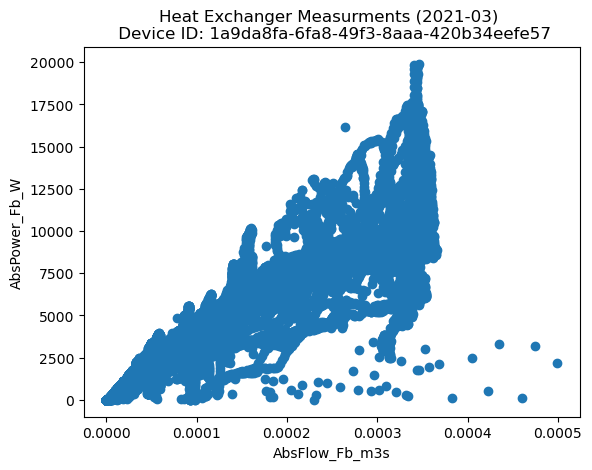

In [6]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202103"
x = "AbsFlow_Fb_m3s"
y = "AbsPower_Fb_W"
df_data = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id) & (col("year_month") == year_month)).toPandas()
year_month = year_month[:4] + '-' + year_month[4:]
plt.scatter(df_data[x], df_data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Heat Exchanger Measurments ({year_month}) \n Device ID: {device_id}")
plt.show()

### Table 3
Cloud api logs describing interactions with our cloud.

In [22]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(10)
df.toPandas()

,api,class,cloudEnv,component,correlationId,developmentDevice,durationInMs,host,httpStatus,logEnv,...,principal,requestId,requestURI,requestURL,signature,signatureFull,signatureId,threadName,userAgent,timestamp
0,device,None,production,core-cloud,CCB:9ae22714-7c8c-4490-8f07-d5fd7793b6cf,NaN,119,logsearch-lifeline-agent-stateful-0.logsearch-...,401,production,...,None,a3818cc09b0af2d7c72134ca5fa93eda,/device-api/registration,https://connect.g2bcc.com/device-api/registration,None,None,None,http-nio-8080-exec-29,"sharedlogic/3.22.5-0 (bsp 10.8.0-0, model 1.2....",2025-01-16 07:45:23.365
1,device,DeviceApiV2DeviceController,production,core-cloud,CCB:fc660e65-b629-4ca1-9adc-ac91cd3fb090,NaN,24,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,4d284824-f2dc-4e47-9641-9c4bd115fbab,db0062793fb9ee45787e4588891f15dc,/device-api/v2/devices/8acbcbb2-0649-429b-b09b...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-93,,2025-01-16 07:45:23.450
2,device,DeviceApiV2DeviceController,production,core-cloud,CCB:6cb197c0-6be1-4e49-82f4-90539ab6ded2,NaN,23,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,d68a34f0-379c-4534-84e9-0278b8539c11,93df335640a41a3e4b1ecc00a4e58304,/device-api/v2/devices/fec4211e-1d9a-41c8-820d...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-146,,2025-01-16 07:45:23.452
3,device,DeviceApiV2DeviceController,production,core-cloud,CCB:c1c628b7-a93b-4118-be48-bc6996e741d6,NaN,23,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,8535e172-1dd3-4ef4-b9c9-fe7cc0b8fe1e,d520e3562dca57fdf3b6c3a9dd405dca,/device-api/v2/devices/cd0fe66e-a33c-4349-9b4a...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-135,,2025-01-16 07:45:23.452
4,device,DeviceApiV2DeviceController,production,core-cloud,CCB:59f1ad10-a5a1-491f-a4df-8d6697819db4,NaN,16,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,492e77b5-61db-45d8-aedd-598132a44471,16543fac22781f75a016e5f378ffc0f0,/device-api/v2/devices/492e77b5-61db-45d8-aedd...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-167,"sharedlogic/3.17.2-0 (bsp 10.5.0-0, model 3.46...",2025-01-16 07:45:23.461
5,device,DeviceUpdateApiController,production,core-cloud,CCB:5f801874-6a4c-46dc-9fe8-e9e0173d6f12,NaN,37,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,712df668-b506-46e2-83d7-aa36bad3bfe1,092a856bd931e3258eba888ed2152408,/device-api/update,https://connect.g2bcc.com/device-api/update,DeviceUpdateApiController.postUpdateInquiry(Up...,ch.belimo.cloud.server.deviceapi.base.DeviceUp...,1aciv1okgkzbs,http-nio-8080-exec-128,"sharedlogic/2.15.10-0 (bsp 9.4.0-0, model 3.35...",2025-01-16 07:45:23.441
6,device,DeviceApiV2DeviceController,production,core-cloud,CCB:fe49b871-e0ea-4d0c-af73-f4fdb29bfdaf,NaN,152,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,3164fbea-bb4f-4819-85dc-ca637272ae74,76d44336c32ffc4fcd439867c89f31f6,/device-api/v2/devices/3164fbea-bb4f-4819-85dc...,https://mobile.g2bcc.com/device-api/v2/devices...,DeviceApiV2DeviceController.getDeviceInfo(String),ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,2yt378c5zm7b,http-nio-8080-exec-16,okhttp/4.12.0,2025-01-16 07:45:23.204
7,device,DeviceApiV2DeviceController,production,core-cloud,CCB:2ff2a0f5-12f5-4682-8c4b-cac101a1c4fa,NaN,34,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,cdefcdba-d291-4565-a53a-411de469eb36,430868f14f32e154790fb7c04093775e,/device-api/v2/devices/cdefcdba-d291-4565